# Code 8: Approximate Bayesian Computation

```{admonition} This is a reference notebook for the book Bayesian Modeling and Computation in Python
:class: tip, dropdown
The textbook is not needed to use or run this code, though the context and explanation is missing from this notebook.

If you'd like a copy it's available
[from the CRC Press](https://www.routledge.com/Bayesian-Modeling-and-Computation-in-Python/Martin-Kumar-Lao/p/book/9780367894368)
or from [Amazon](https://www.routledge.com/Bayesian-Modeling-and-Computation-in-Python/Martin-Kumar-Lao/p/book/9780367894368).
``

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats

from scr.rf_selector import select_model

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300
np.random.seed(1346)

## Fitting a Gaussian the ABC-way

### Figure 8.2

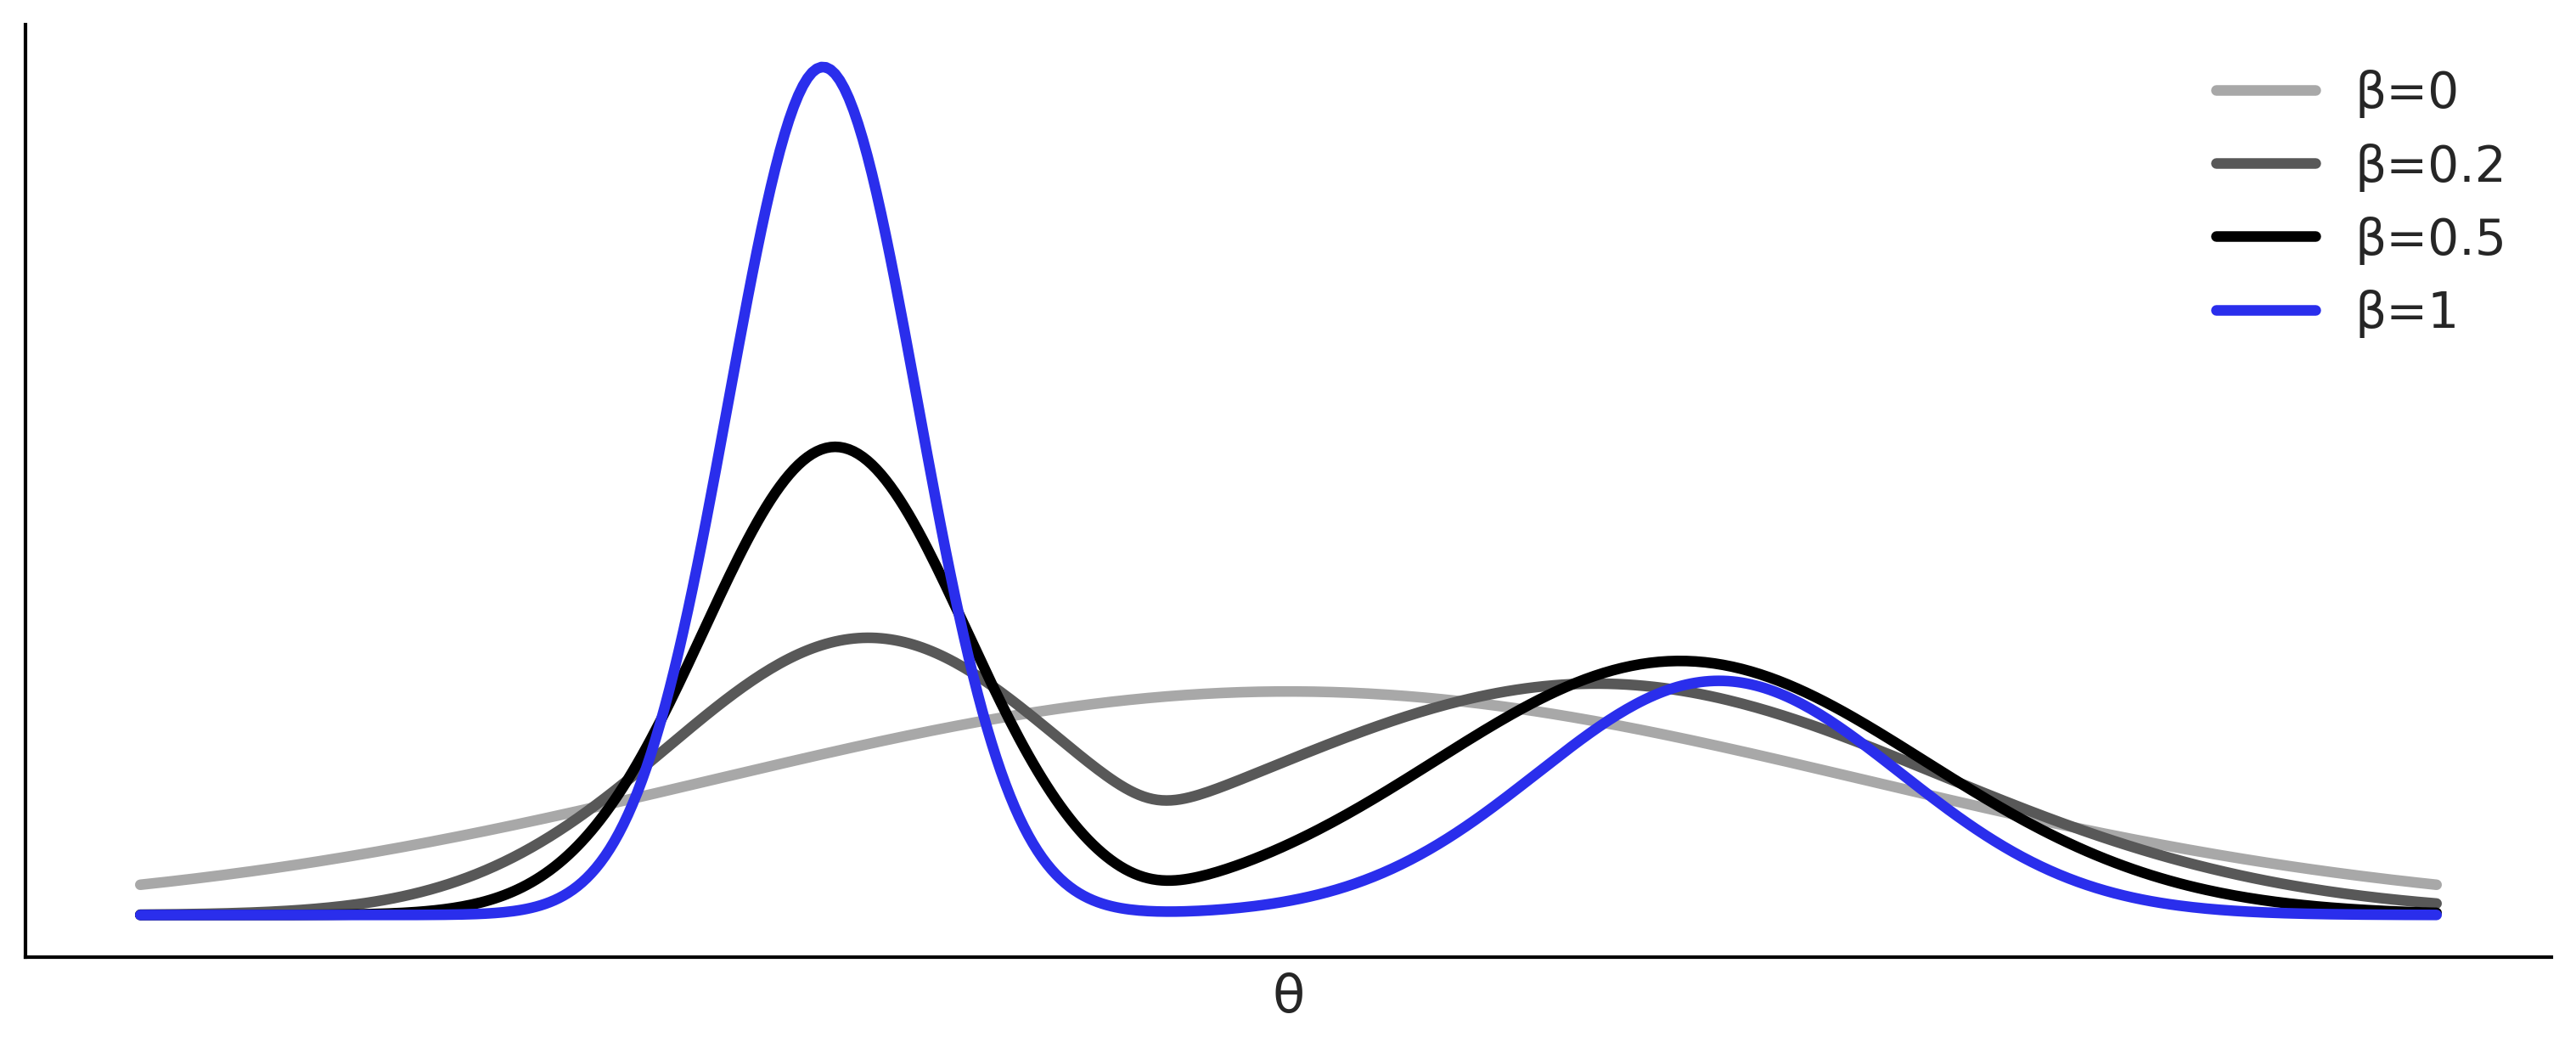

In [3]:
a = stats.norm(-2.5, 0.5)
b = stats.norm(2.5, 1)
c = stats.norm(0, 3)
x = np.linspace(-6, 6, 500)

lpdf = 0.65 * a.pdf(x) + 0.35* b.pdf(x)
ppdf = c.pdf(x)
_, ax = plt.subplots(figsize=(10, 4))
for c, β in zip(["#A8A8A8", "#585858", "#000000", "#2a2eec"],
                [0, 0.2, 0.5, 1]):
    post = ppdf * lpdf**β
    post /= post.sum()
    ax.plot(x, post, lw=3, label=f"β={β}", color=c)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("θ")
ax.legend()
# plt.savefig("img/chp08/smc_tempering.png")

## Fitting a Gaussian the ABC-way

In [4]:
data = np.random.normal(loc=0, scale=1, size=1000)

def normal_simulator(μ, σ):
    return np.random.normal(μ, σ, 1000)

### Code 8.2 and Figure 8.3

In [5]:
with pm.Model() as gauss:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     distance="gaussian",
                     sum_stat="sort",          
                     epsilon=1,
                     observed=data)
    trace_g = pm.sample_smc(kernel="ABC",
                            parallel=True)

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.004
Stage:   1 Beta: 0.015
Stage:   2 Beta: 0.049
Stage:   3 Beta: 0.166
Stage:   4 Beta: 0.538
Stage:   5 Beta: 1.000


In [6]:
az.summary(trace_g)

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
μ -0.061  0.045  -0.142    0.025        0.0      0.0   12102.0   11972.0   
σ  0.998  0.038   0.925    1.069        0.0      0.0   11972.0   11353.0   

   r_hat  
μ    1.0  
σ    1.0

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


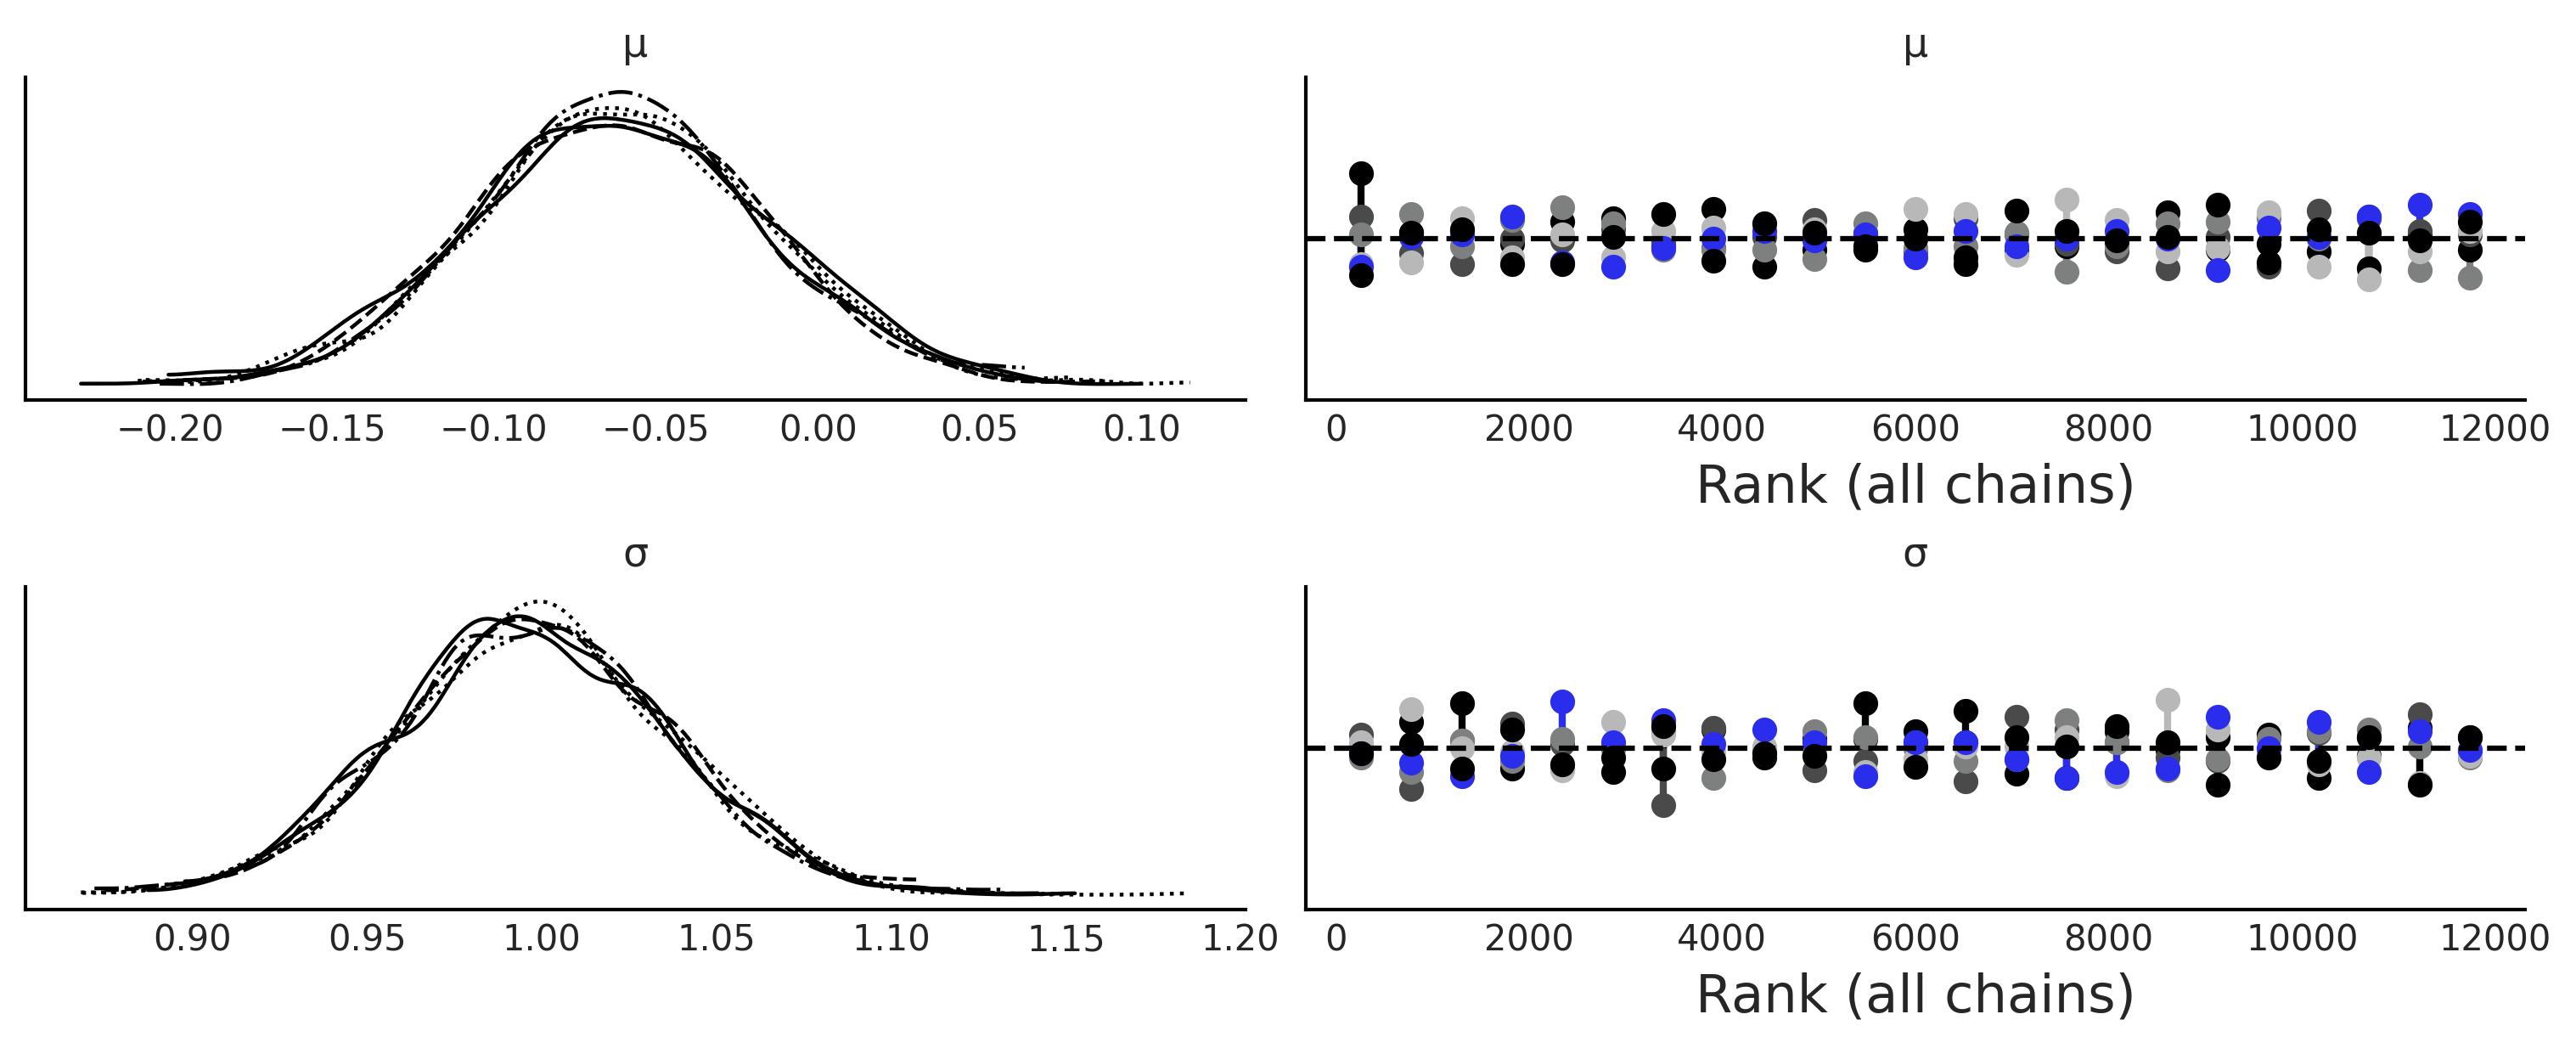

In [7]:
az.plot_trace(trace_g, kind="rank_vlines", figsize=(10, 4));
# plt.savefig('img/chp08/trace_g.png')

## Choosing the Distance Function, $\epsilon$ and the Summary Statistics

### Codes 8.4, 8.5, 8.6, 8.7, and 8.8

In [8]:
with pm.Model() as gauss_001:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=0.1,
                     observed=data)
    trace_g_001, sim_data_001 = pm.sample_smc(kernel="ABC",
                                      parallel=True,
                                      save_sim_data=True)

with pm.Model() as gauss_01:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=1,
                     observed=data)
    trace_g_01, sim_data_01 = pm.sample_smc(kernel="ABC",
                                      parallel=True,
                                      save_sim_data=True)
    
with pm.Model() as gauss_02:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=2,
                     observed=data)
    trace_g_02, sim_data_02 = pm.sample_smc(kernel="ABC",
                                      parallel=True,
                                      save_sim_data=True)  
    
with pm.Model() as gauss_05:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=5,
                     observed=data)
    trace_g_05, sim_data_05 = pm.sample_smc(kernel="ABC",
                                      parallel=True,
                                      save_sim_data=True)
    
with pm.Model() as gauss_10:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Simulator('s', normal_simulator, params=[μ, σ],
                     sum_stat="sort",
                     epsilon=10,
                     observed=data)
    trace_g_10, sim_data_10 = pm.sample_smc(kernel="ABC",
                                      parallel=True,
                                      save_sim_data=True)


with pm.Model() as gauss_NUTS:
    μ = pm.Normal('μ', mu=0, sd=1)
    σ = pm.HalfNormal('σ', sd=1)
    s = pm.Normal('s', μ, σ,
                  observed=data)
    trace_g_nuts = pm.sample()

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.001
Stage:   3 Beta: 0.002
Stage:   4 Beta: 0.006
Stage:   5 Beta: 0.015
Stage:   6 Beta: 0.034
Stage:   7 Beta: 0.068
Stage:   8 Beta: 0.132
Stage:   9 Beta: 0.225
Stage:  10 Beta: 0.323
Stage:  11 Beta: 0.461
Stage:  12 Beta: 0.730
Stage:  13 Beta: 1.000
Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.004
Stage:   1 Beta: 0.015
Stage:   2 Beta: 0.054
Stage:   3 Beta: 0.186
Stage:   4 Beta: 0.598
Stage:   5 Beta: 1.000
Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.015
Stage:   1 Beta: 0.058
Stage:   2 Beta: 0.199
Stage:   3 Beta: 0.667
Stage:   4 Beta: 1.000
Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.092
Stage:   1 Beta: 0.359
Stage:   2 Beta: 1.000
Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.374
Stage:   1 Beta: 1.000
/tmp/ipykernel_276756/38499026

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


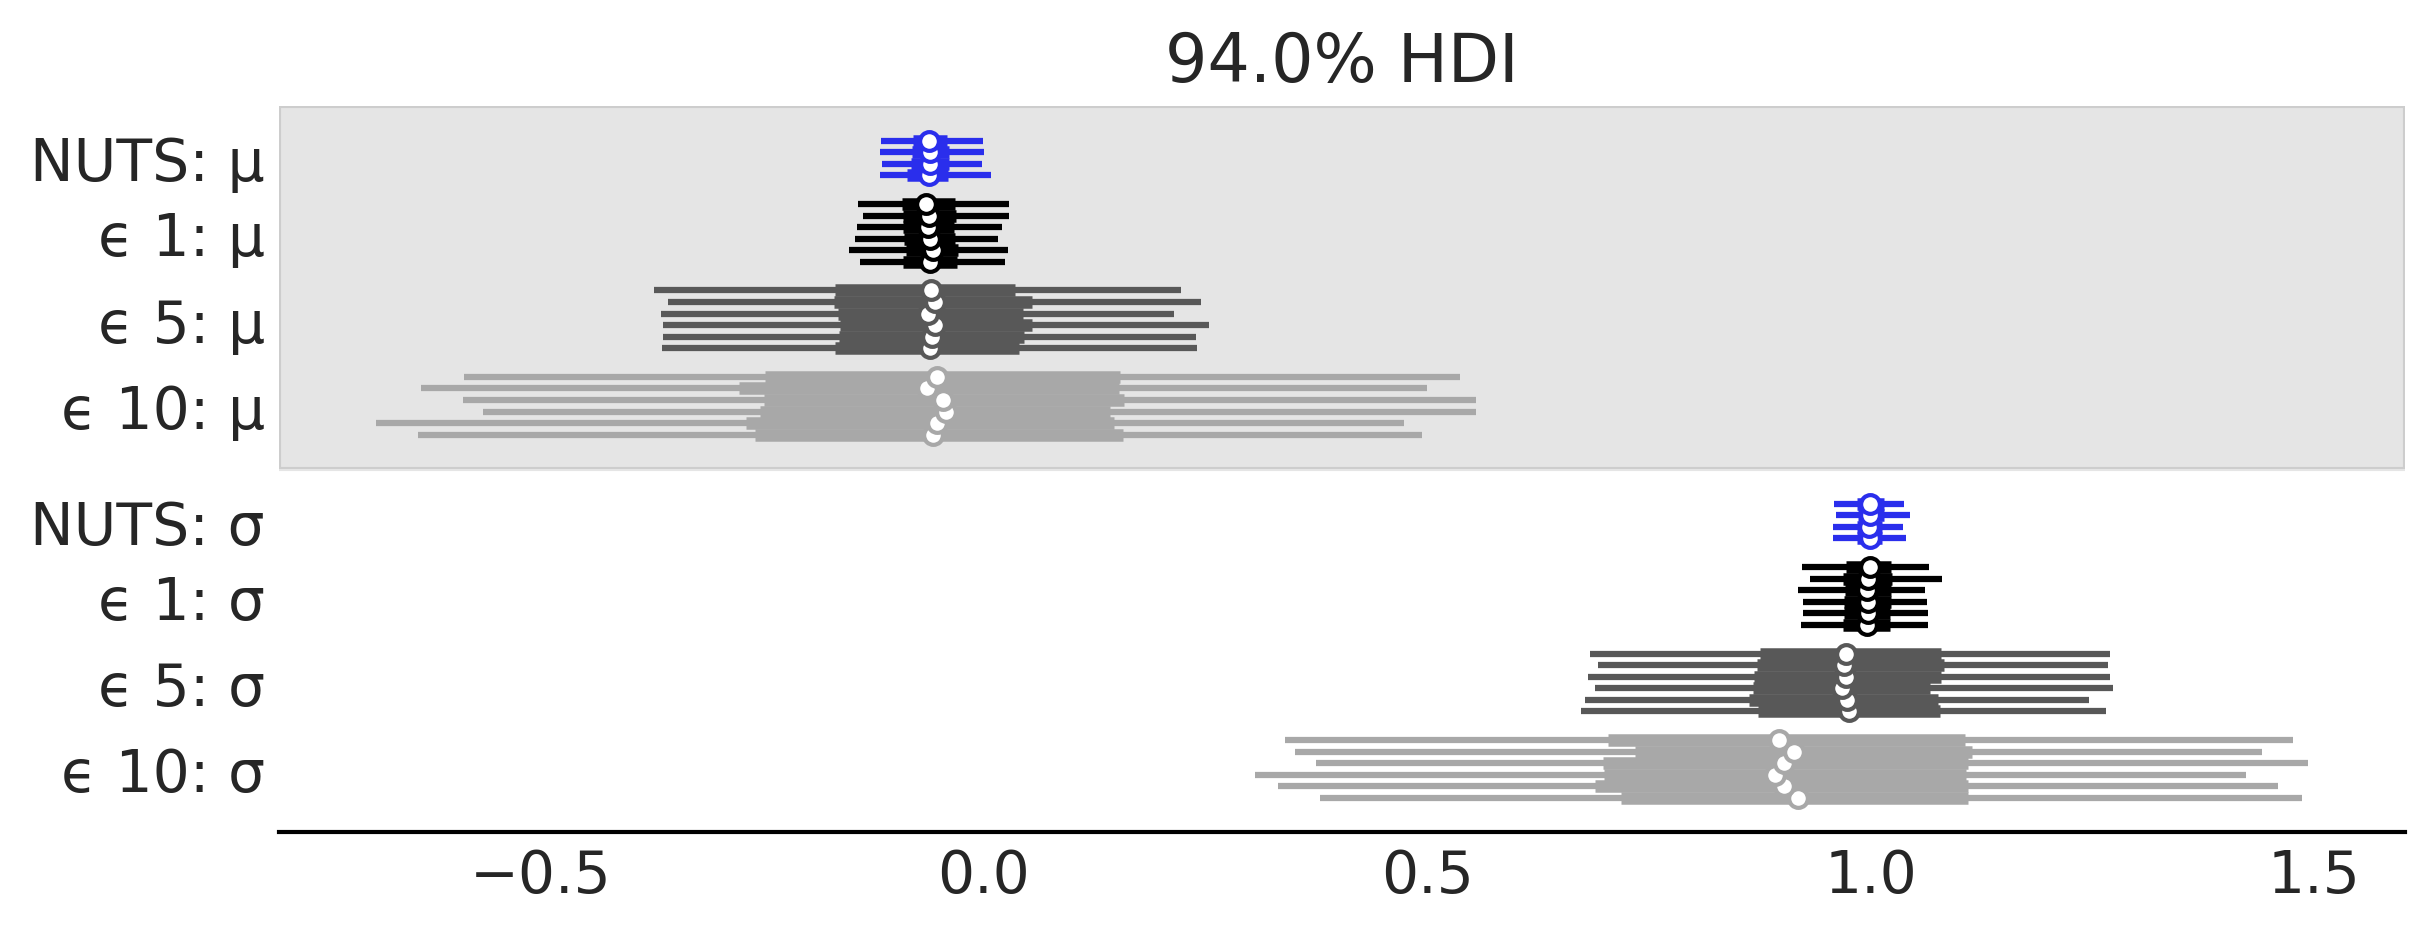

In [9]:
traces = [trace_g_nuts, trace_g_01, trace_g_05, trace_g_10]
az.plot_forest(traces, model_names=["NUTS", "ϵ 1", "ϵ 5", "ϵ 10"],
               colors=["#2a2eec", "#000000", "#585858", "#A8A8A8"],
               figsize=(8, 3));
# plt.savefig("img/chp08/trace_g_many_eps.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


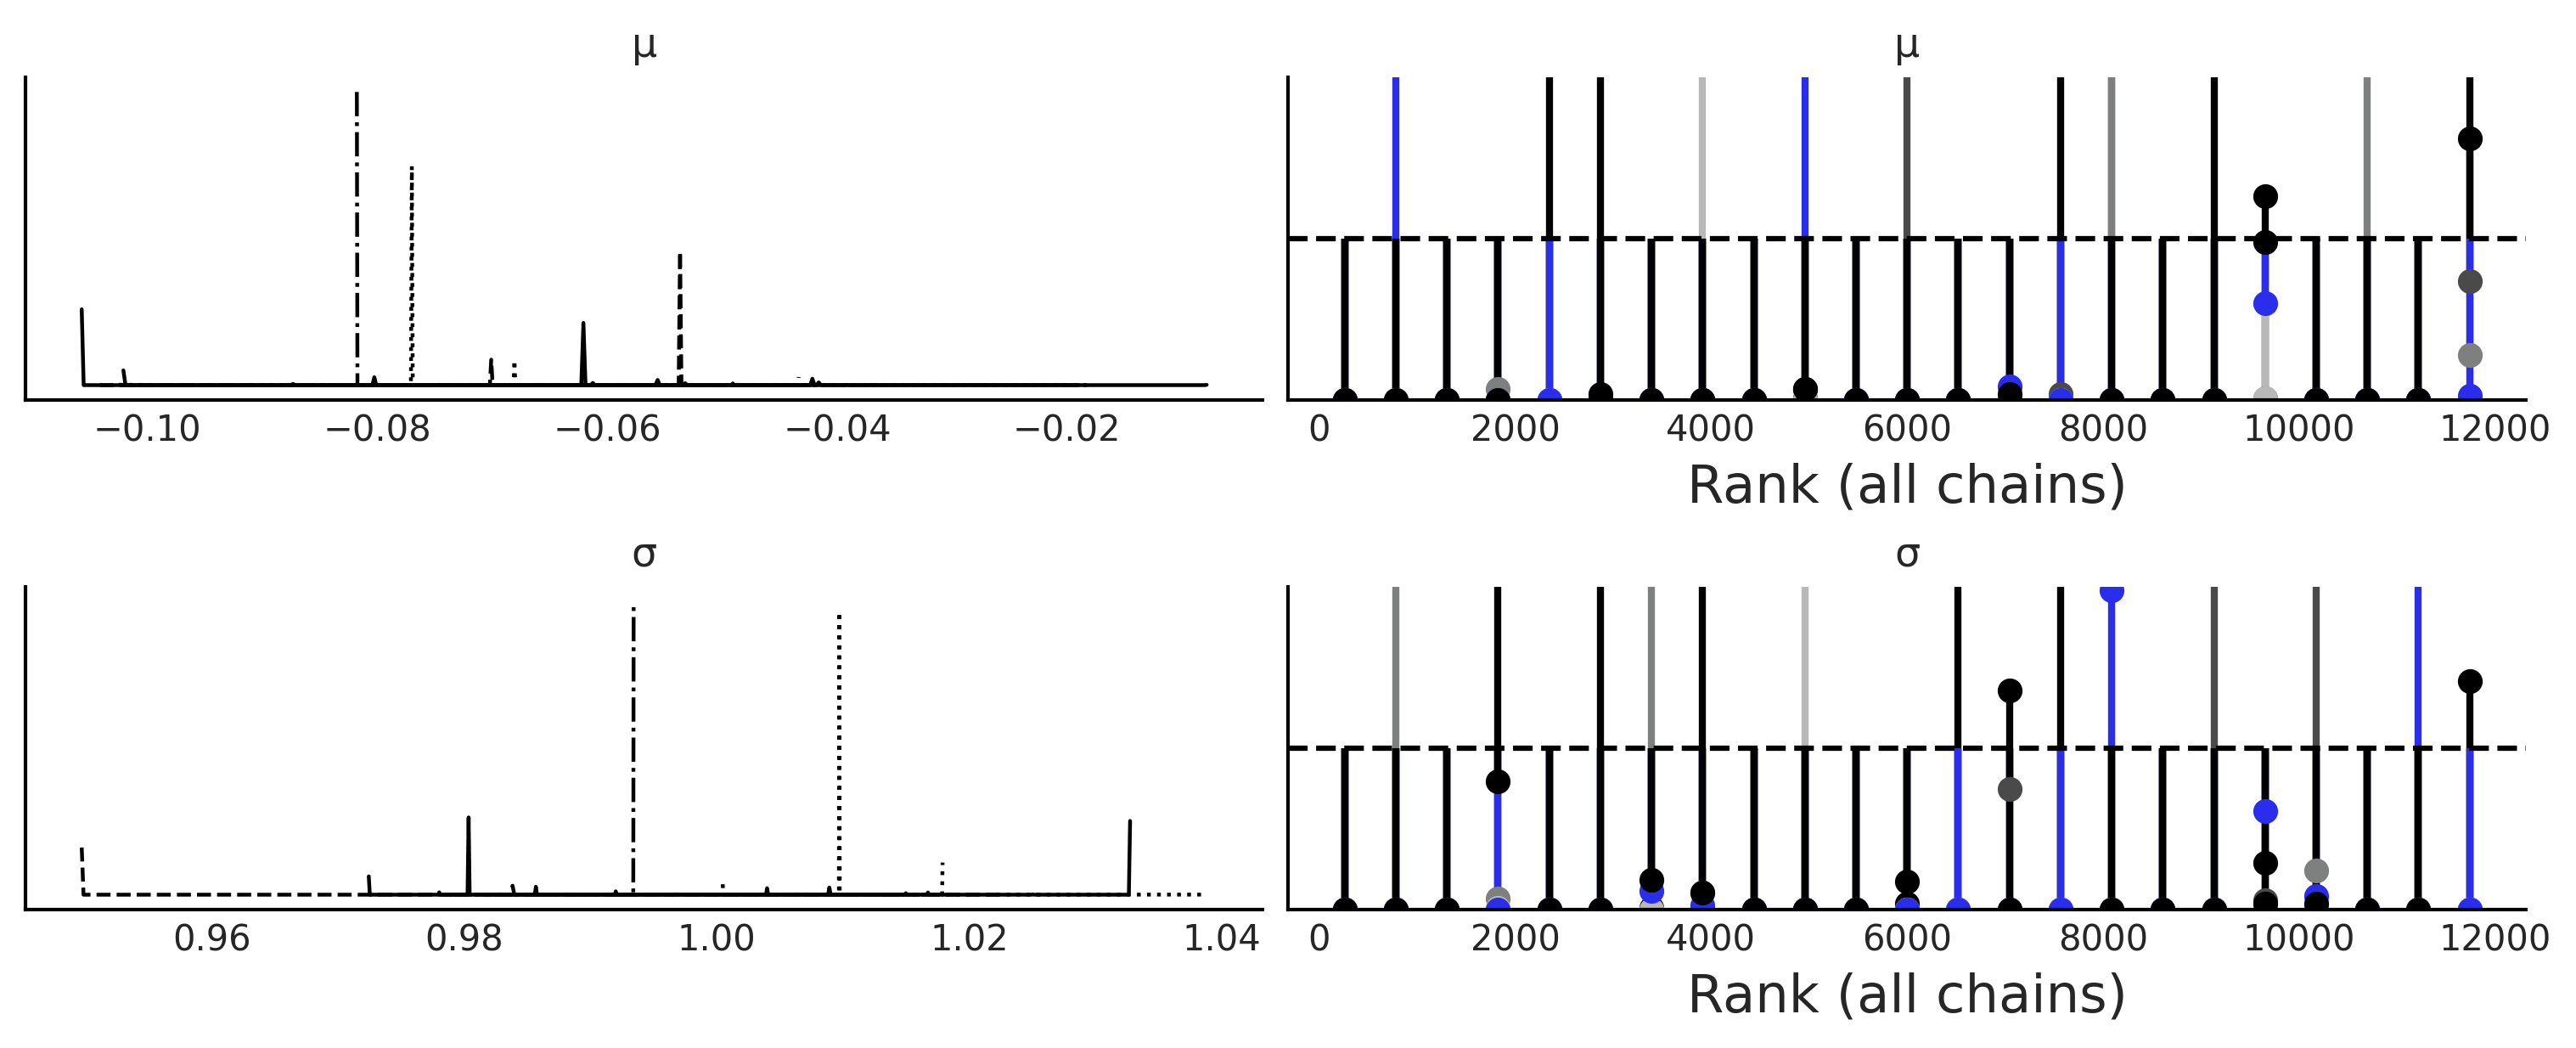

In [10]:
az.plot_trace(trace_g_001, kind="rank_vlines", figsize=(10, 4));
# plt.savefig("img/chp08/trace_g_eps_too_low.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (8000,1500) (1000,) 

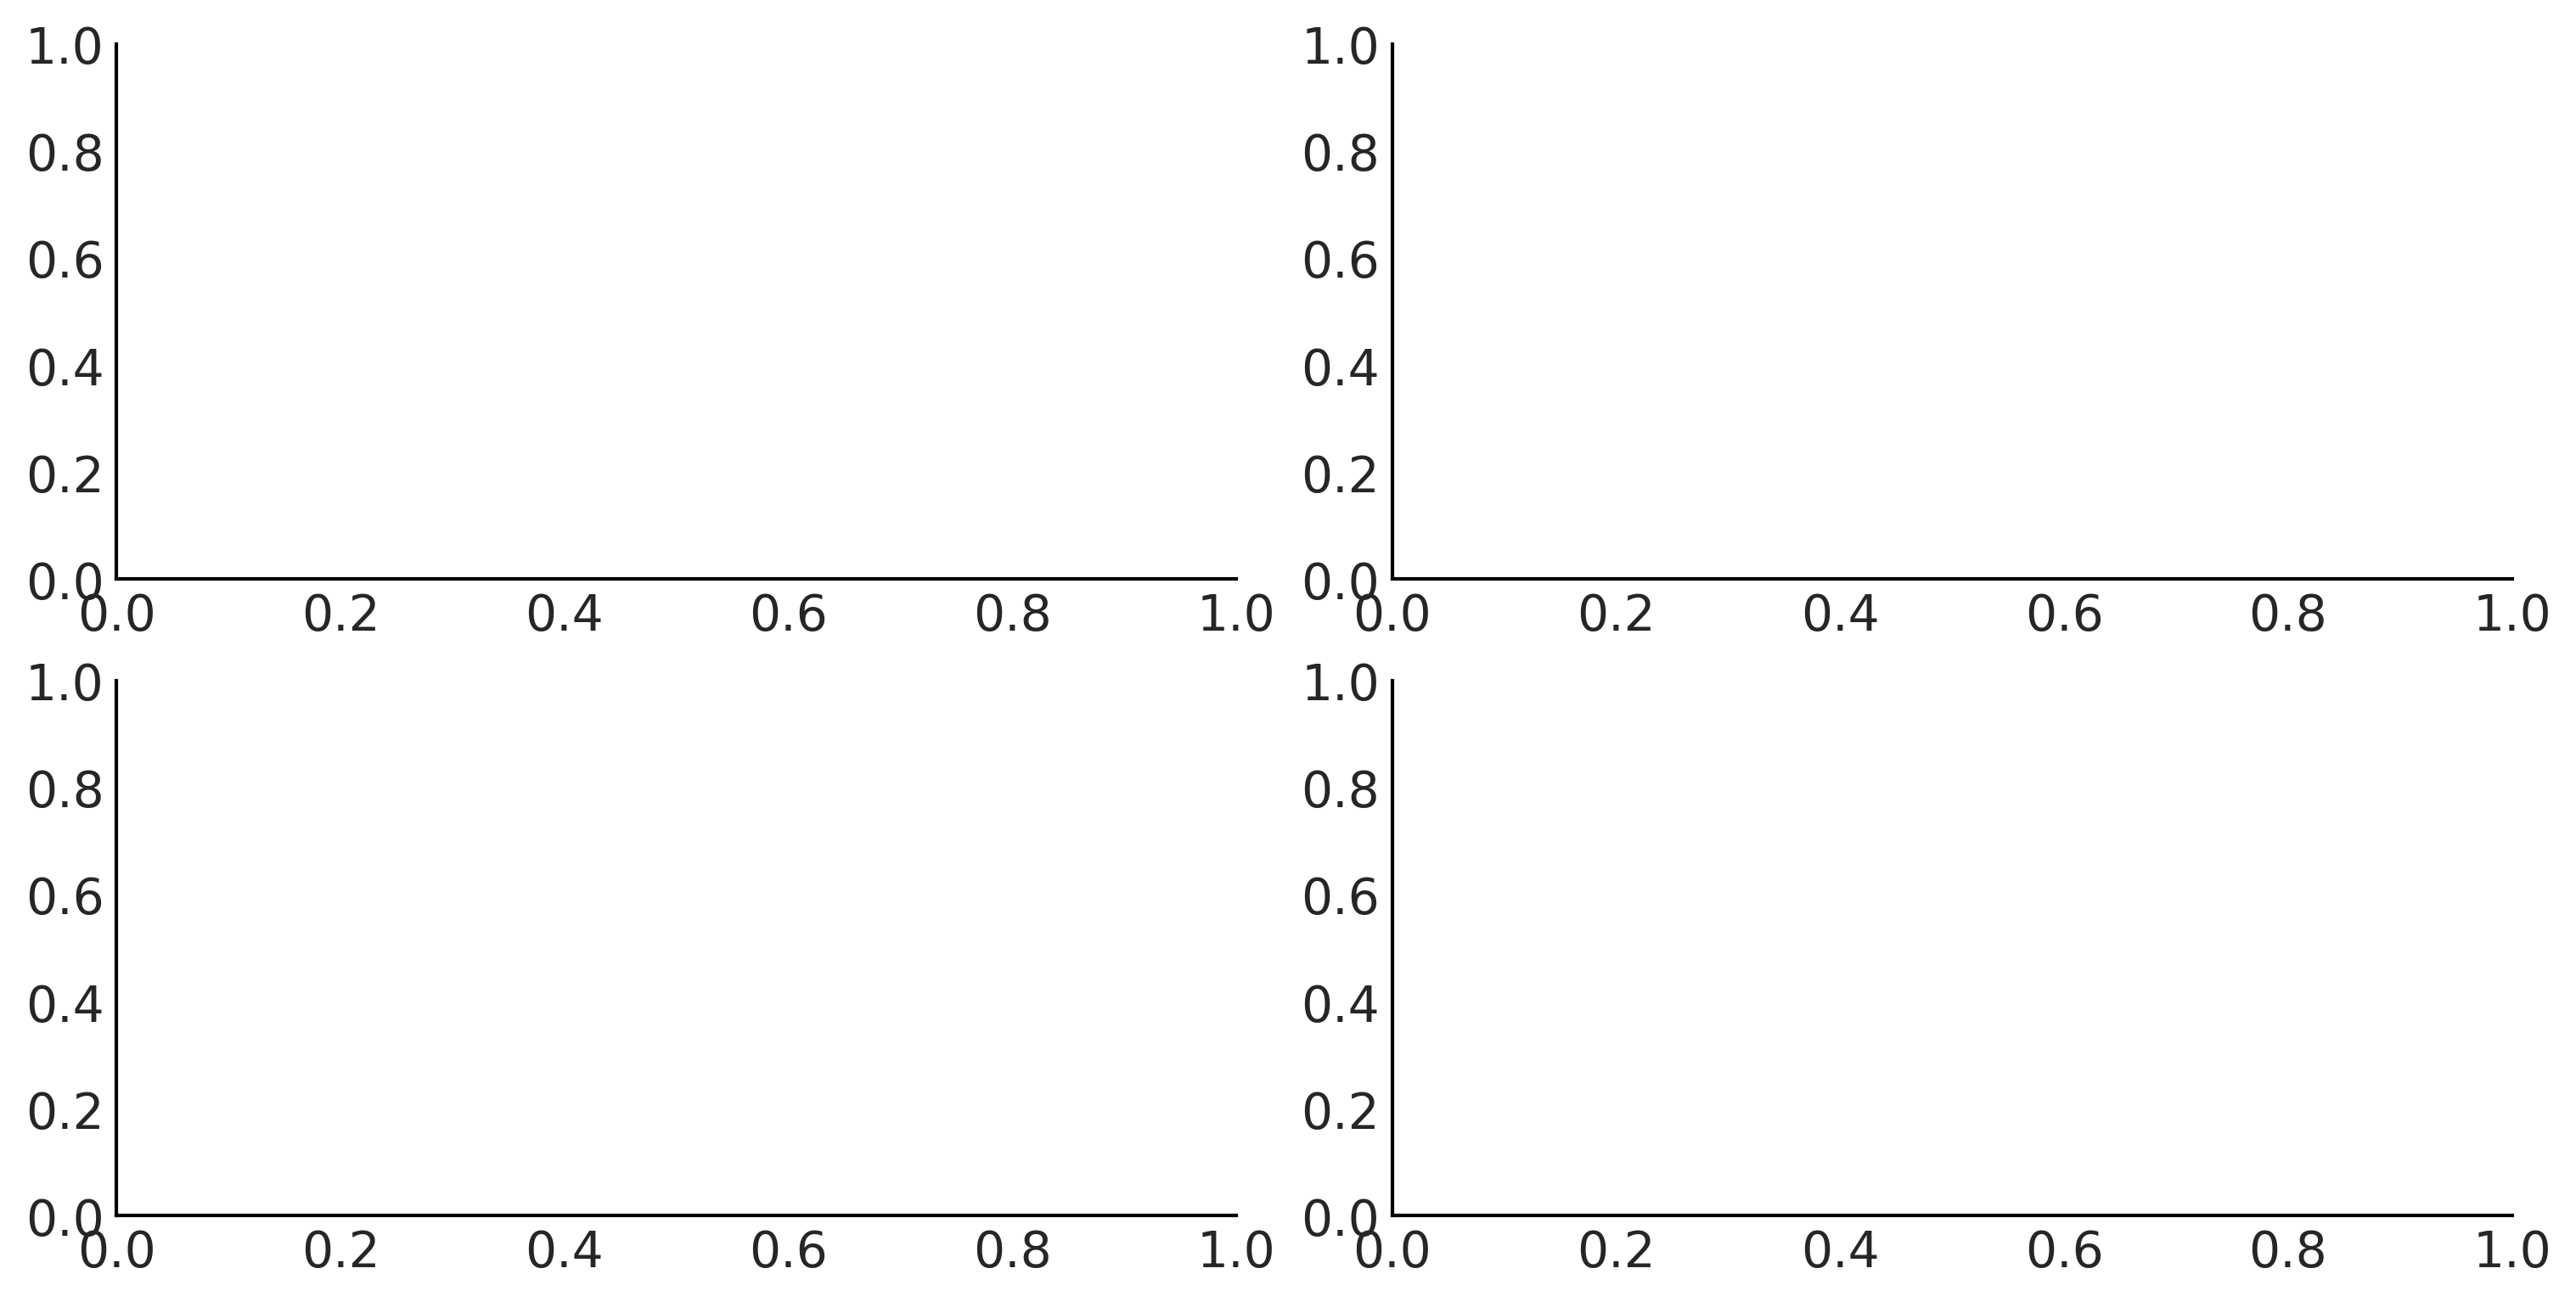

In [11]:
traces_ = [trace_g_001, trace_g_01, trace_g_05, trace_g_10]
sim_data_ = [sim_data_001, sim_data_01, sim_data_05, sim_data_10]
epsilons = [0.1, 1, 5, 10]

_, axes = plt.subplots(2, 2, figsize=(10,5))

for i, ax in enumerate(axes.ravel()):
    dada = az.from_pymc3(traces_[i], 
                         posterior_predictive=sim_data_[i])

    pp_vals = np.reshape(sim_data_[i]["s"], (8000, -1))
    tstat_pit = np.mean(pp_vals <= data, axis=0)
    _, tstat_pit_dens = az.kde(tstat_pit)
    
    ax.axhline(1, color="w")
    az.plot_bpv(dada, kind="u_value", ax=ax, reference="analytical")
    ax.tick_params(axis='both', pad=7)
    ax.set_title(f"ϵ={epsilons[i]}, mse={np.mean((1 - tstat_pit_dens)**2) * 100:.2f}")

# plt.savefig("img/chp08/bpv_g_many_eps_00.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pym

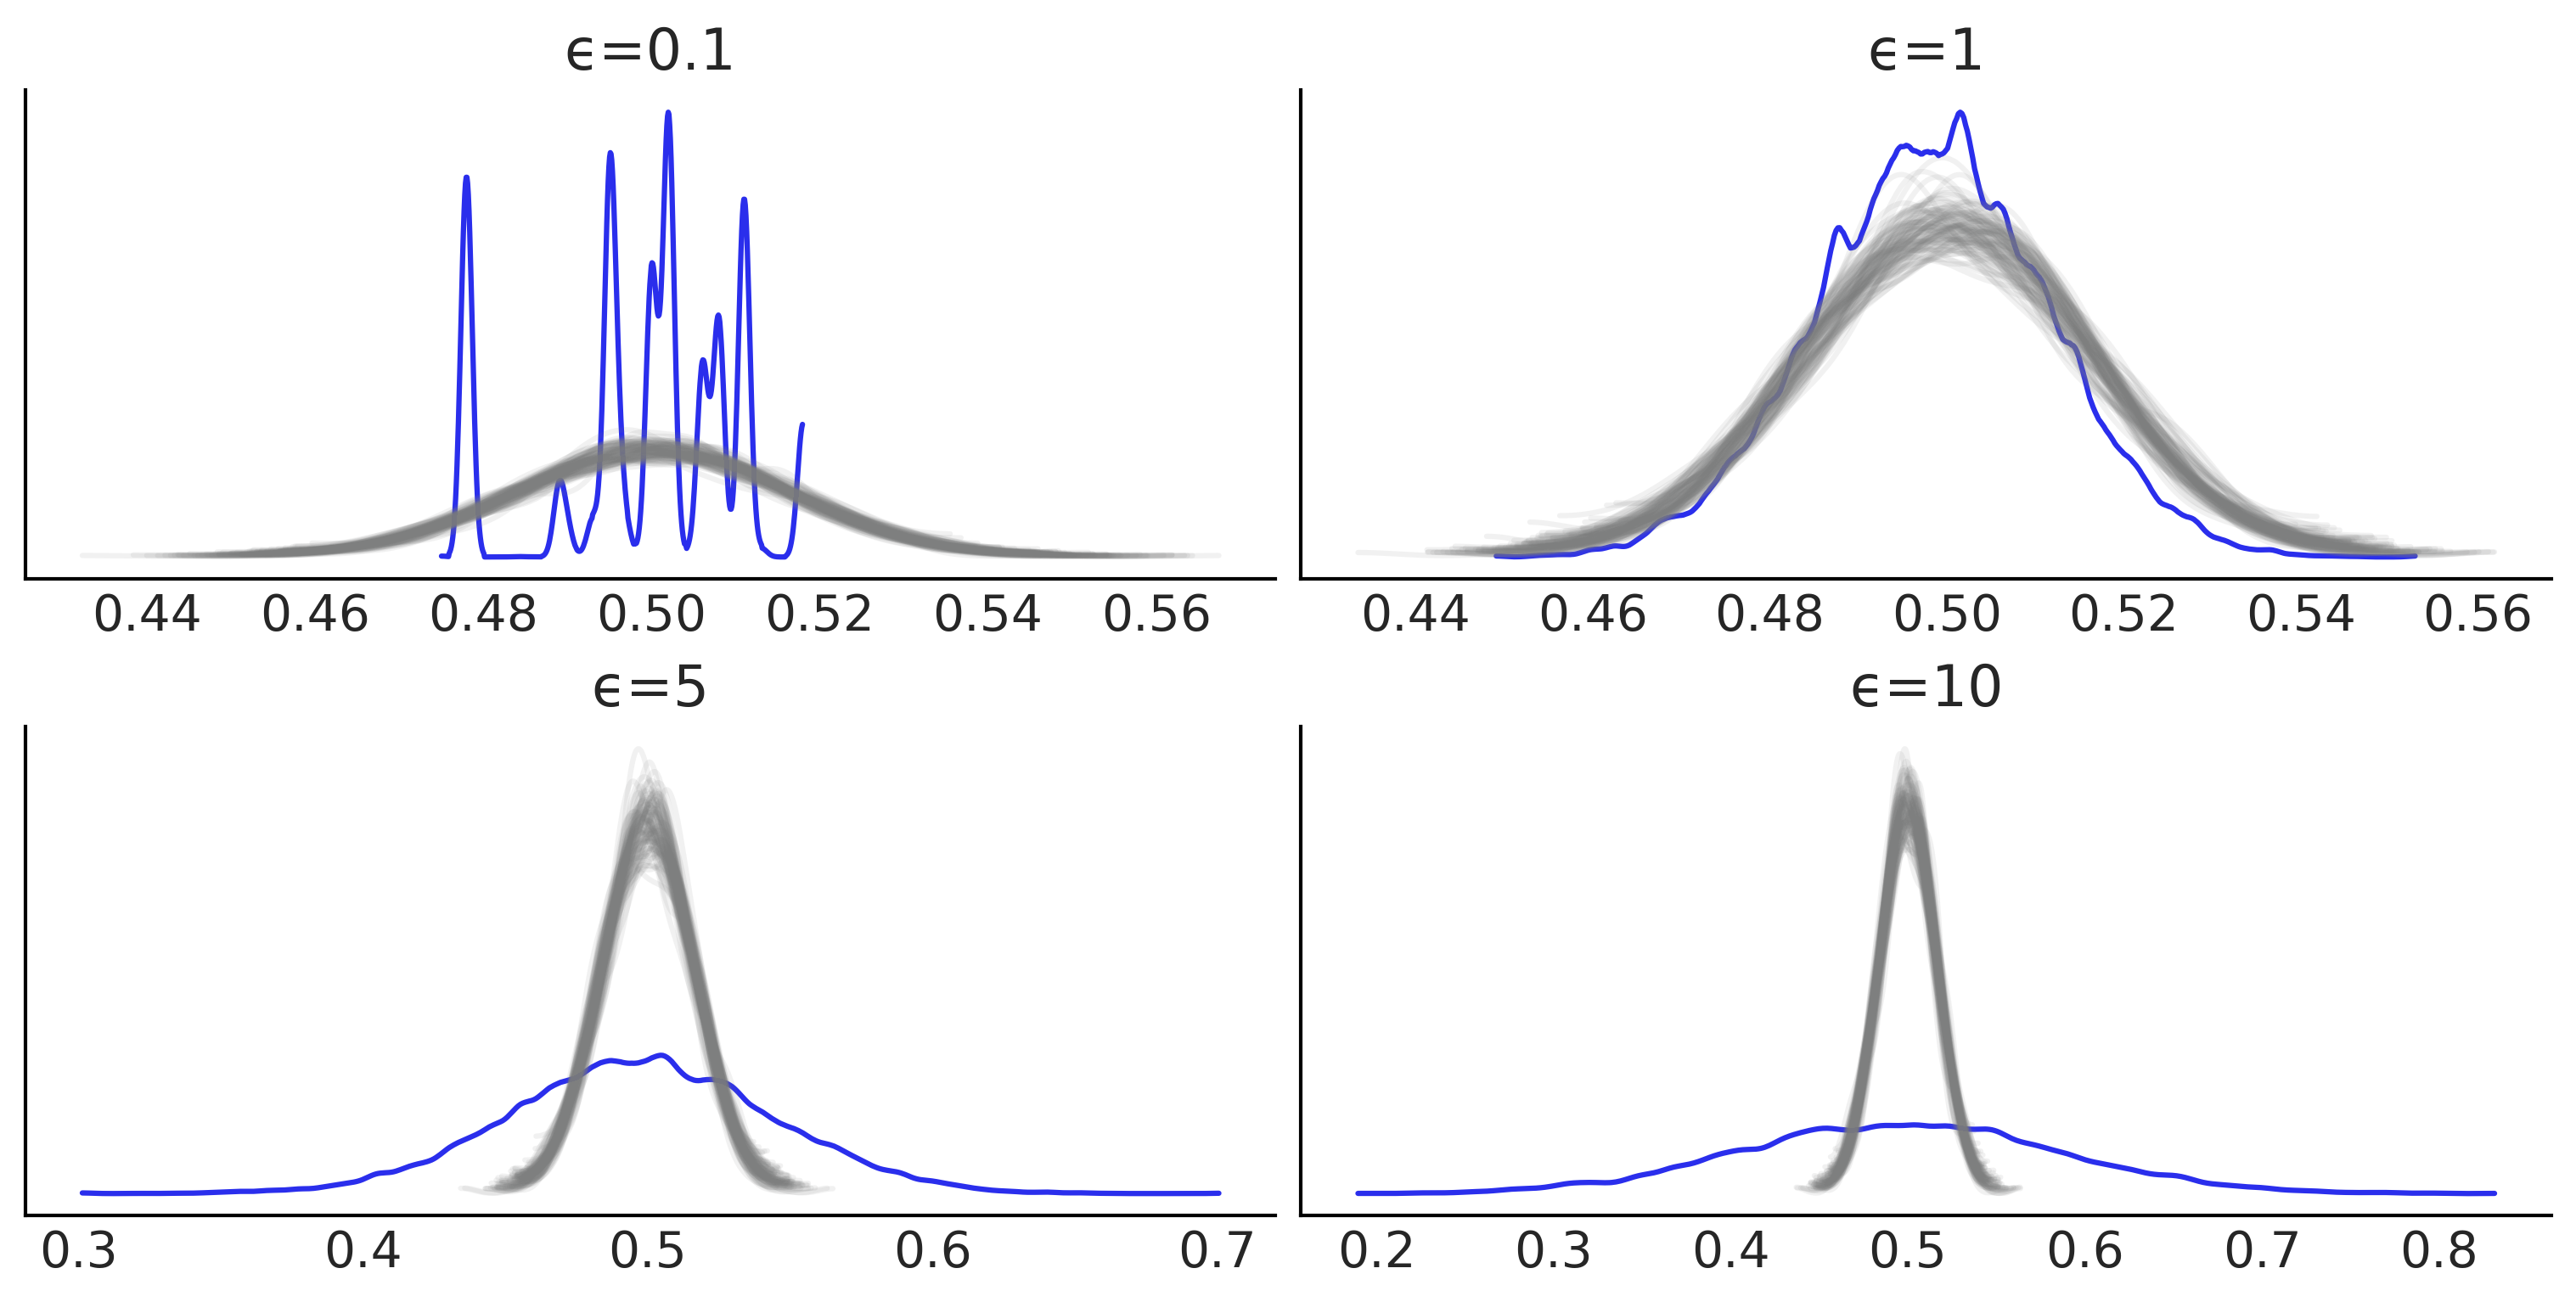

In [12]:
_, ax = plt.subplots(2, 2, figsize=(10,5))

ax = ax.ravel()
for i in range(4):
    dada = az.from_pymc3(traces_[i], 
                         posterior_predictive=sim_data_[i])

    az.plot_bpv(dada, kind="p_value", reference='samples', color="C4", ax=ax[i],
               plot_ref_kwargs={"color":"C2"})
    ax[i].set_title(f"ϵ={epsilons[i]}")
# plt.savefig("img/chp08/bpv_g_many_eps_01.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pym

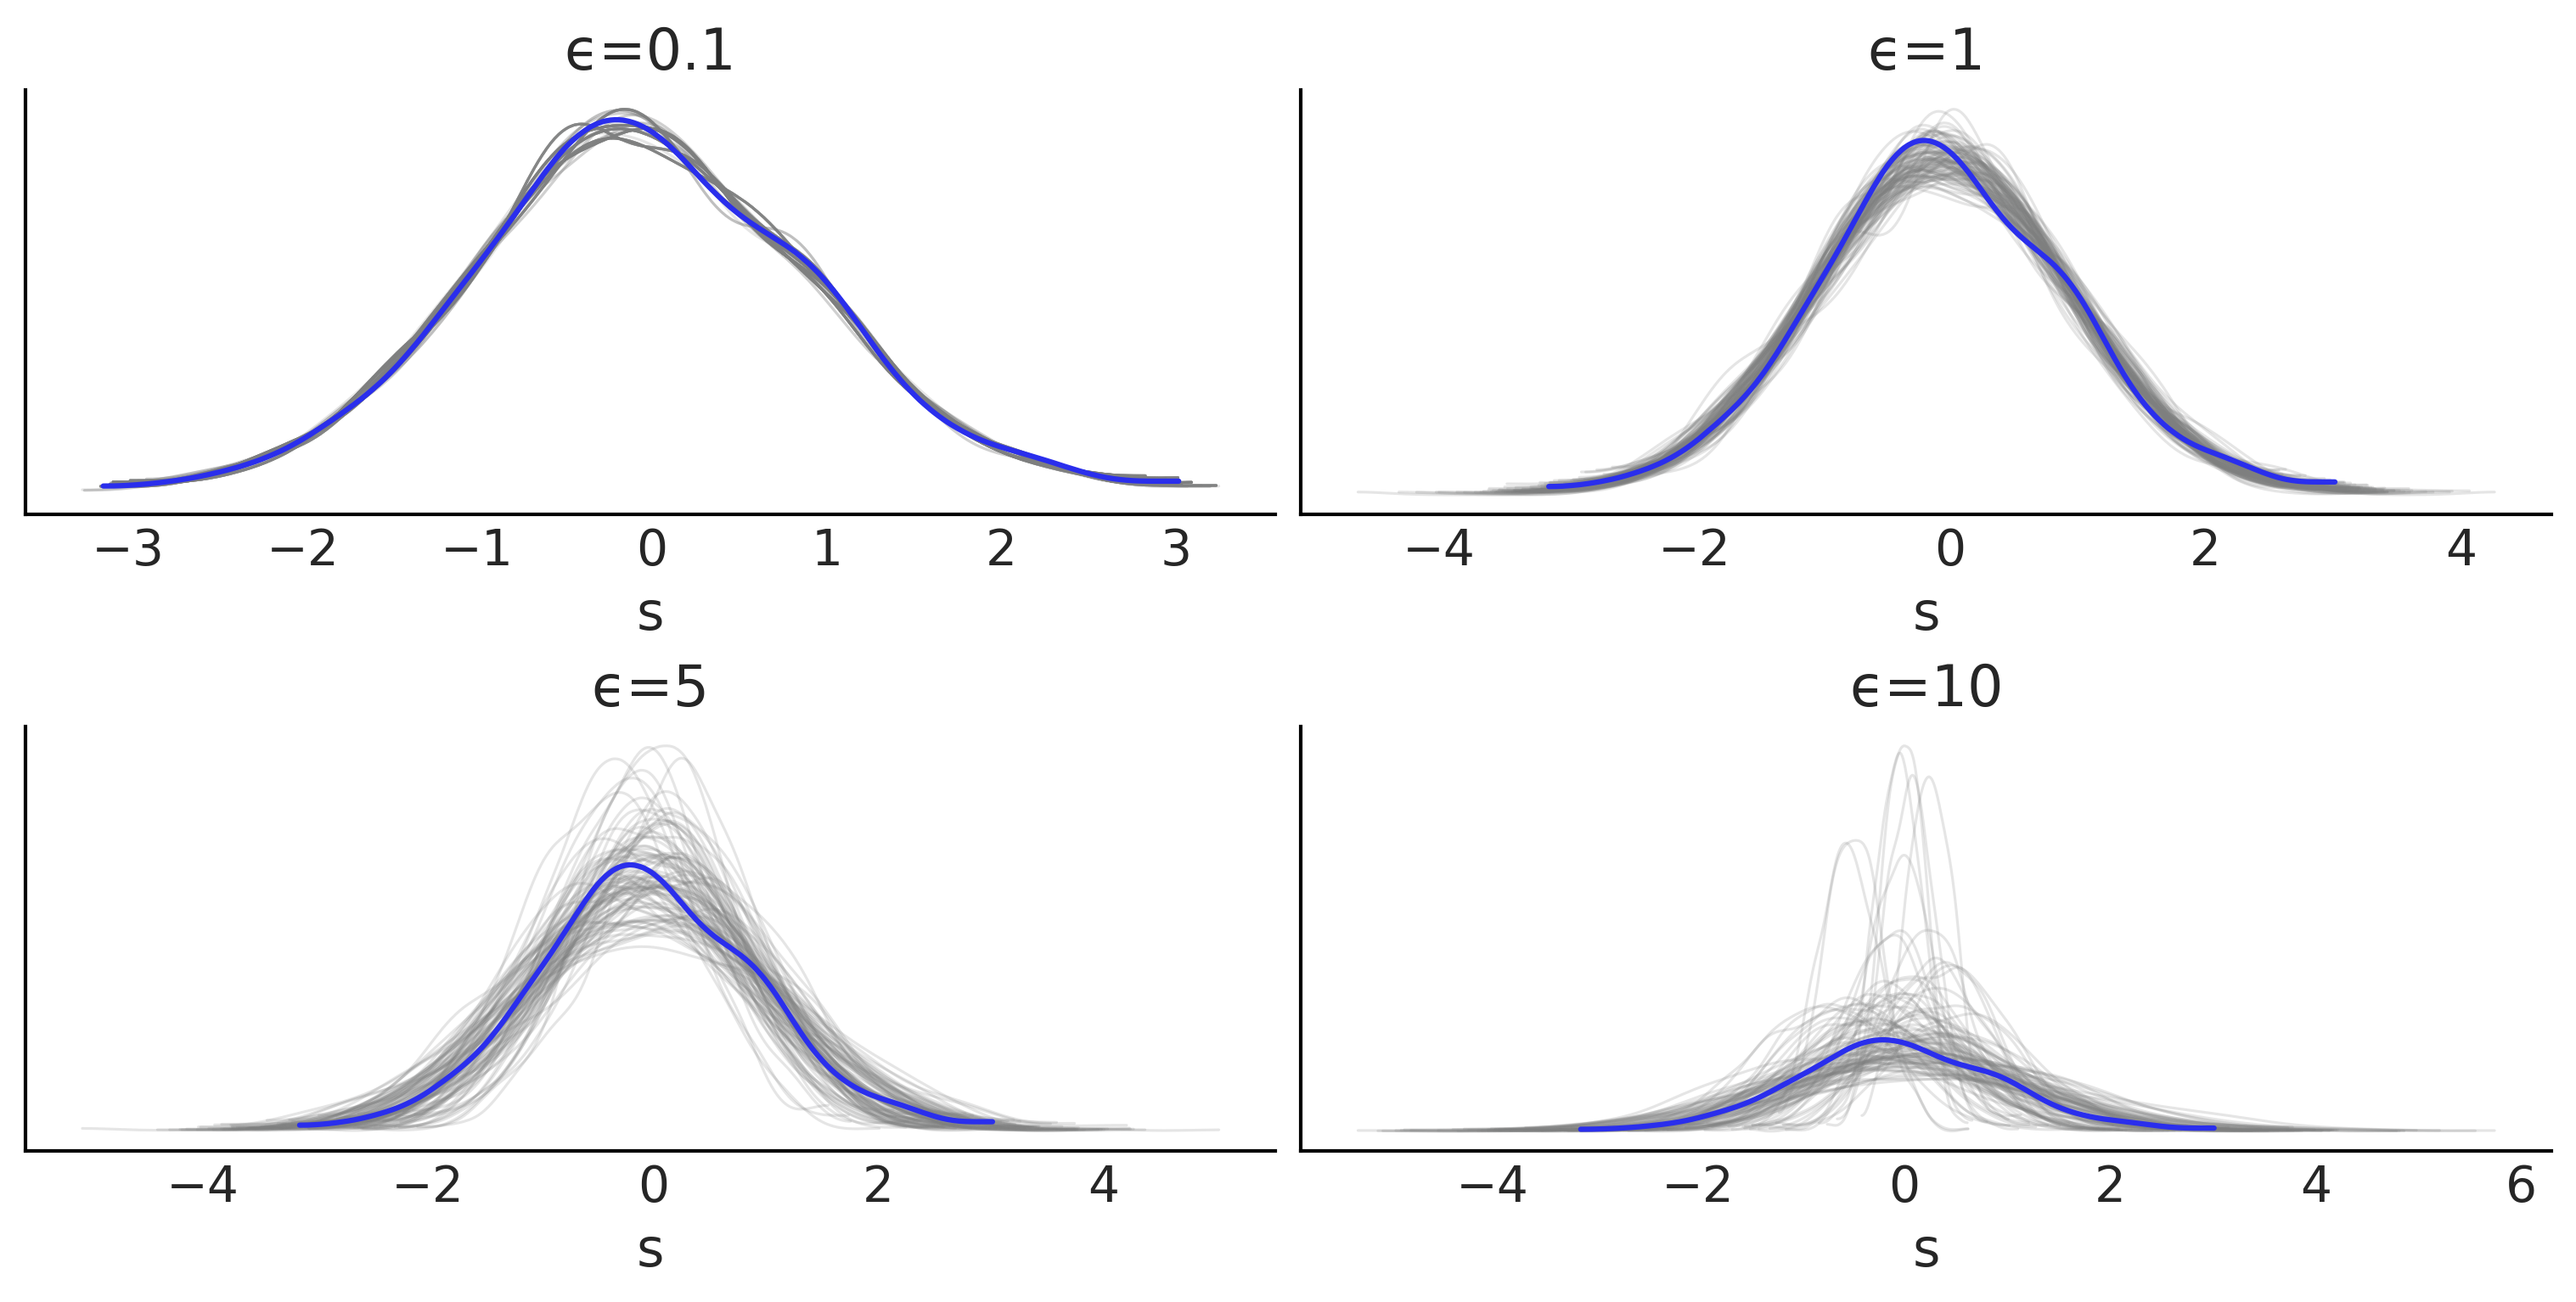

In [13]:
_, axes = plt.subplots(2, 2, figsize=(10,5))

for i, ax in enumerate(axes.ravel()):
    dada = az.from_pymc3(traces_[i], 
                         posterior_predictive=sim_data_[i])

    az.plot_ppc(dada, num_pp_samples=100, ax=ax, color="C2",
                mean=False, legend=False, observed=False)
    az.plot_kde(dada.observed_data["s"], plot_kwargs={"color":"C4"}, ax=ax)
    ax.set_xlabel("s")
    ax.set_title(f"ϵ={epsilons[i]}")
# plt.savefig("img/chp08/ppc_g_many_eps.png")

## g-and-k distributions

### Figure 8.9

In [14]:
data = pd.read_csv("data/air_pollution_bsas.csv")
bsas_co = data["co"].dropna().values

'We have 8 observations larger than 3 ppm'

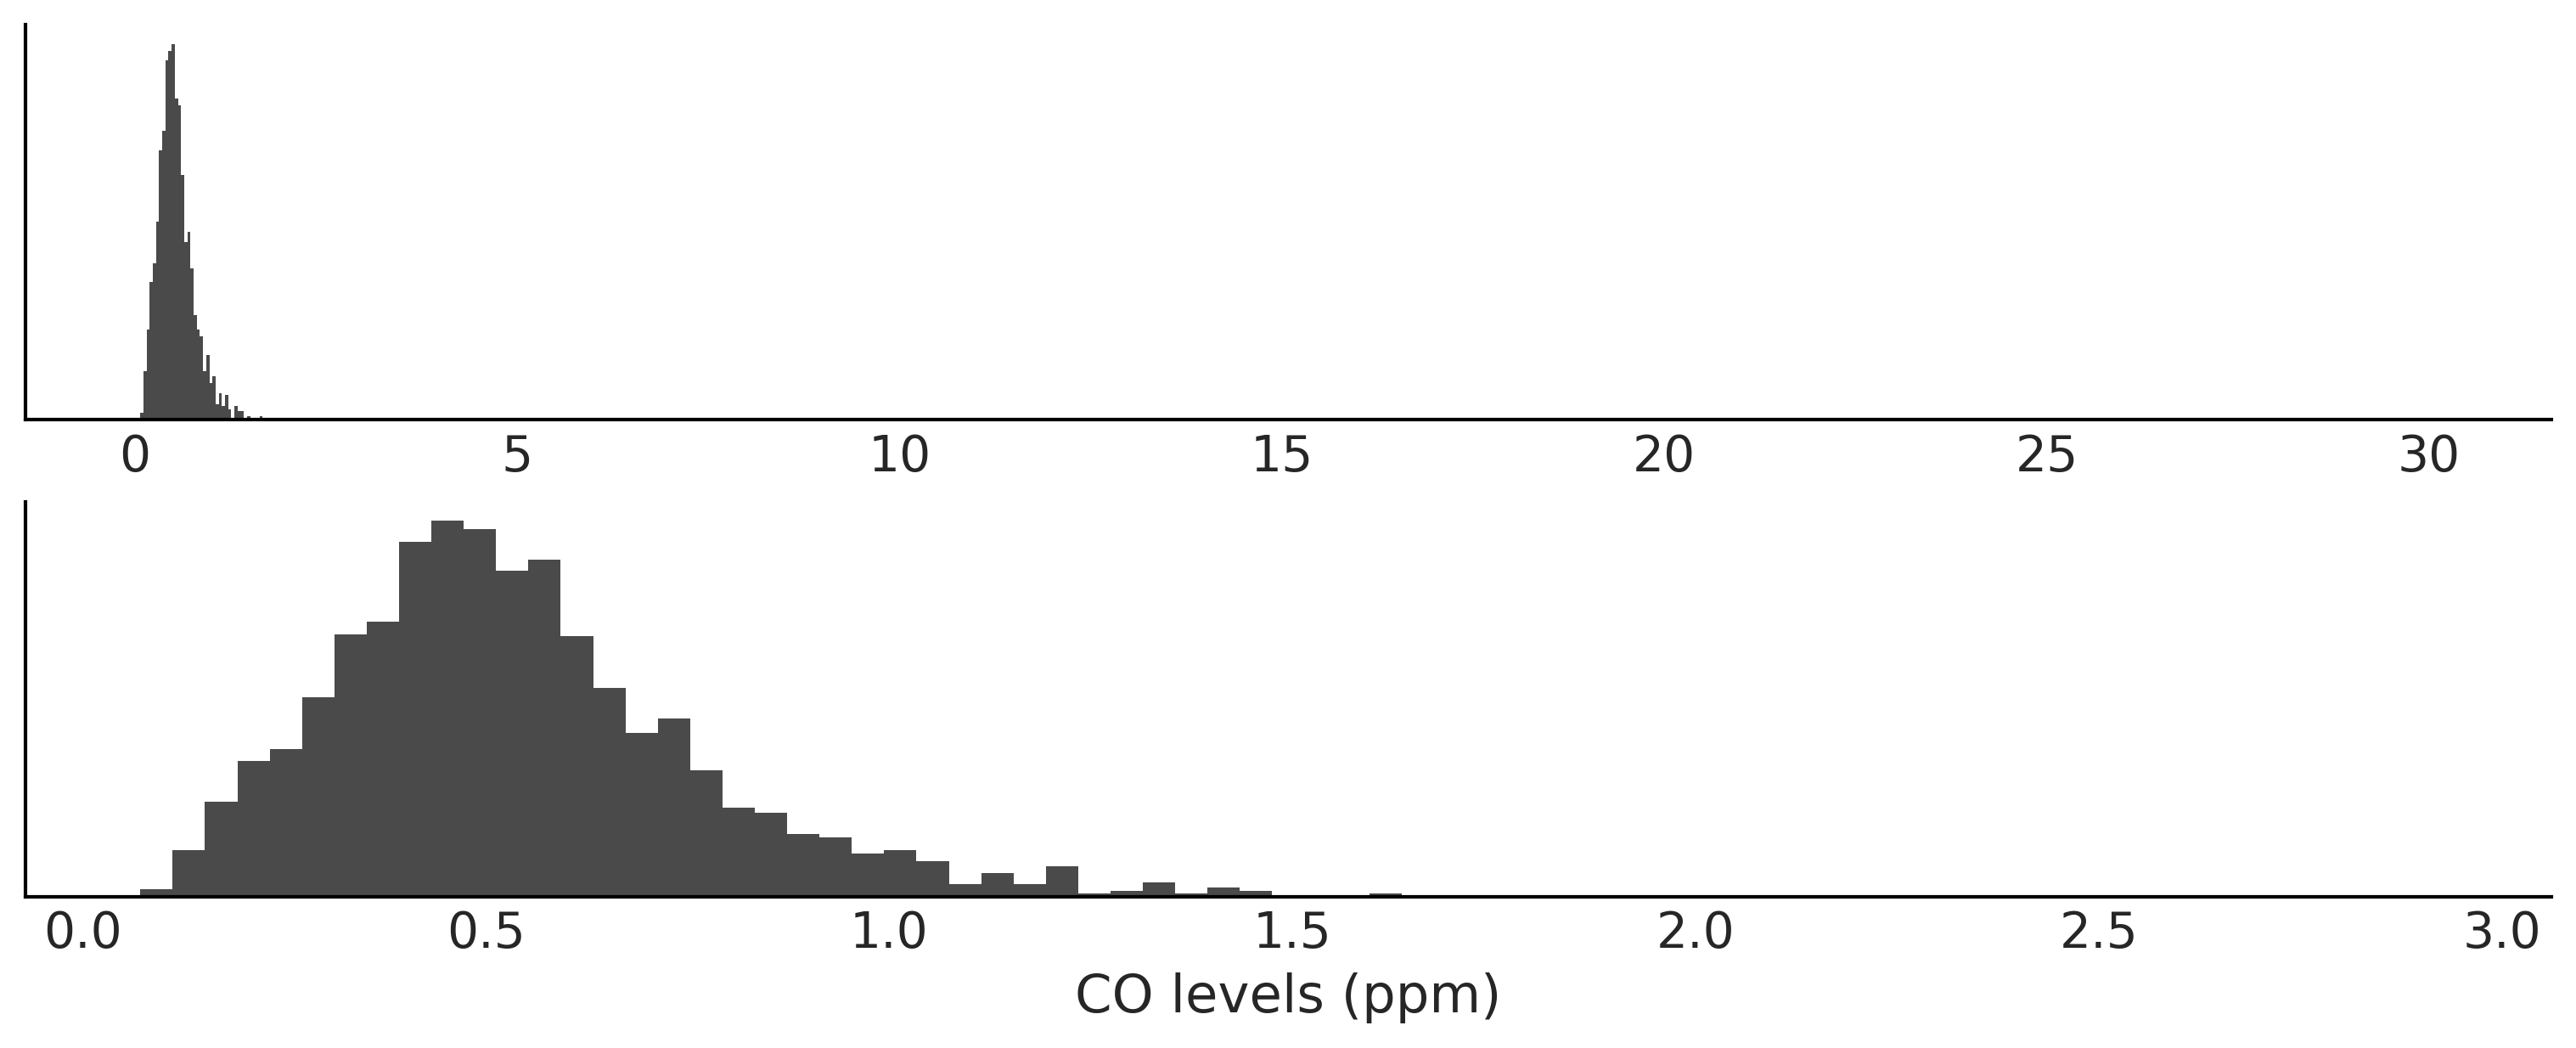

In [17]:
_, axes = plt.subplots(2,1,  figsize=(10,4), sharey=True)
axes[0].hist(bsas_co, bins="auto", color="C1", density=True)
axes[0].set_yticks([])
axes[1].hist(bsas_co[bsas_co < 3], bins="auto", color="C1", density=True)
axes[1].set_yticks([])
axes[1].set_xlabel("CO levels (ppm)")
# plt.savefig("img/chp08/co_ppm_bsas.png")
f"We have {sum(bsas_co > 3)} observations larger than 3 ppm"

### Code 8.4 and Figure 8.10

In [18]:
class g_and_k_quantile:
    def __init__(self):
        self.quantile_normal = stats.norm(0, 1).ppf
        self.pdf_normal = stats.norm(0, 1).pdf

    def ppf(self, x, a, b, g, k):
        z = self.quantile_normal(x)
        return a + b * (1 + 0.8 * np.tanh(g*z/2)) * ((1 + z**2)**k) * z

    
    def rvs(self, samples, a, b, g, k):
        x = np.random.uniform(0, 1, samples)
        return self.ppf(x, a, b, g, k)

    def cdf(self, x, a, b, g, k, zscale=False):   
        optimize.fminbound(f, -5, 5)

    def pdf(self, x, a, b, g, k):
        #z = cdf(x, a, b, g, k)
        z = x
        z_sq = z**2
        term1 = (1+z_sq)**k
        term2 = 1+0.8*np.tanh(g*x/2)
        term3 = (1+(2*k+1)*z_sq)/(1+z_sq)
        term4 = 0.8*g*z/(2*np.cosh(g*z/2)**2)

        deriv = b*term1*(term2*term3+term4)
        return self.pdf_normal(x) / deriv

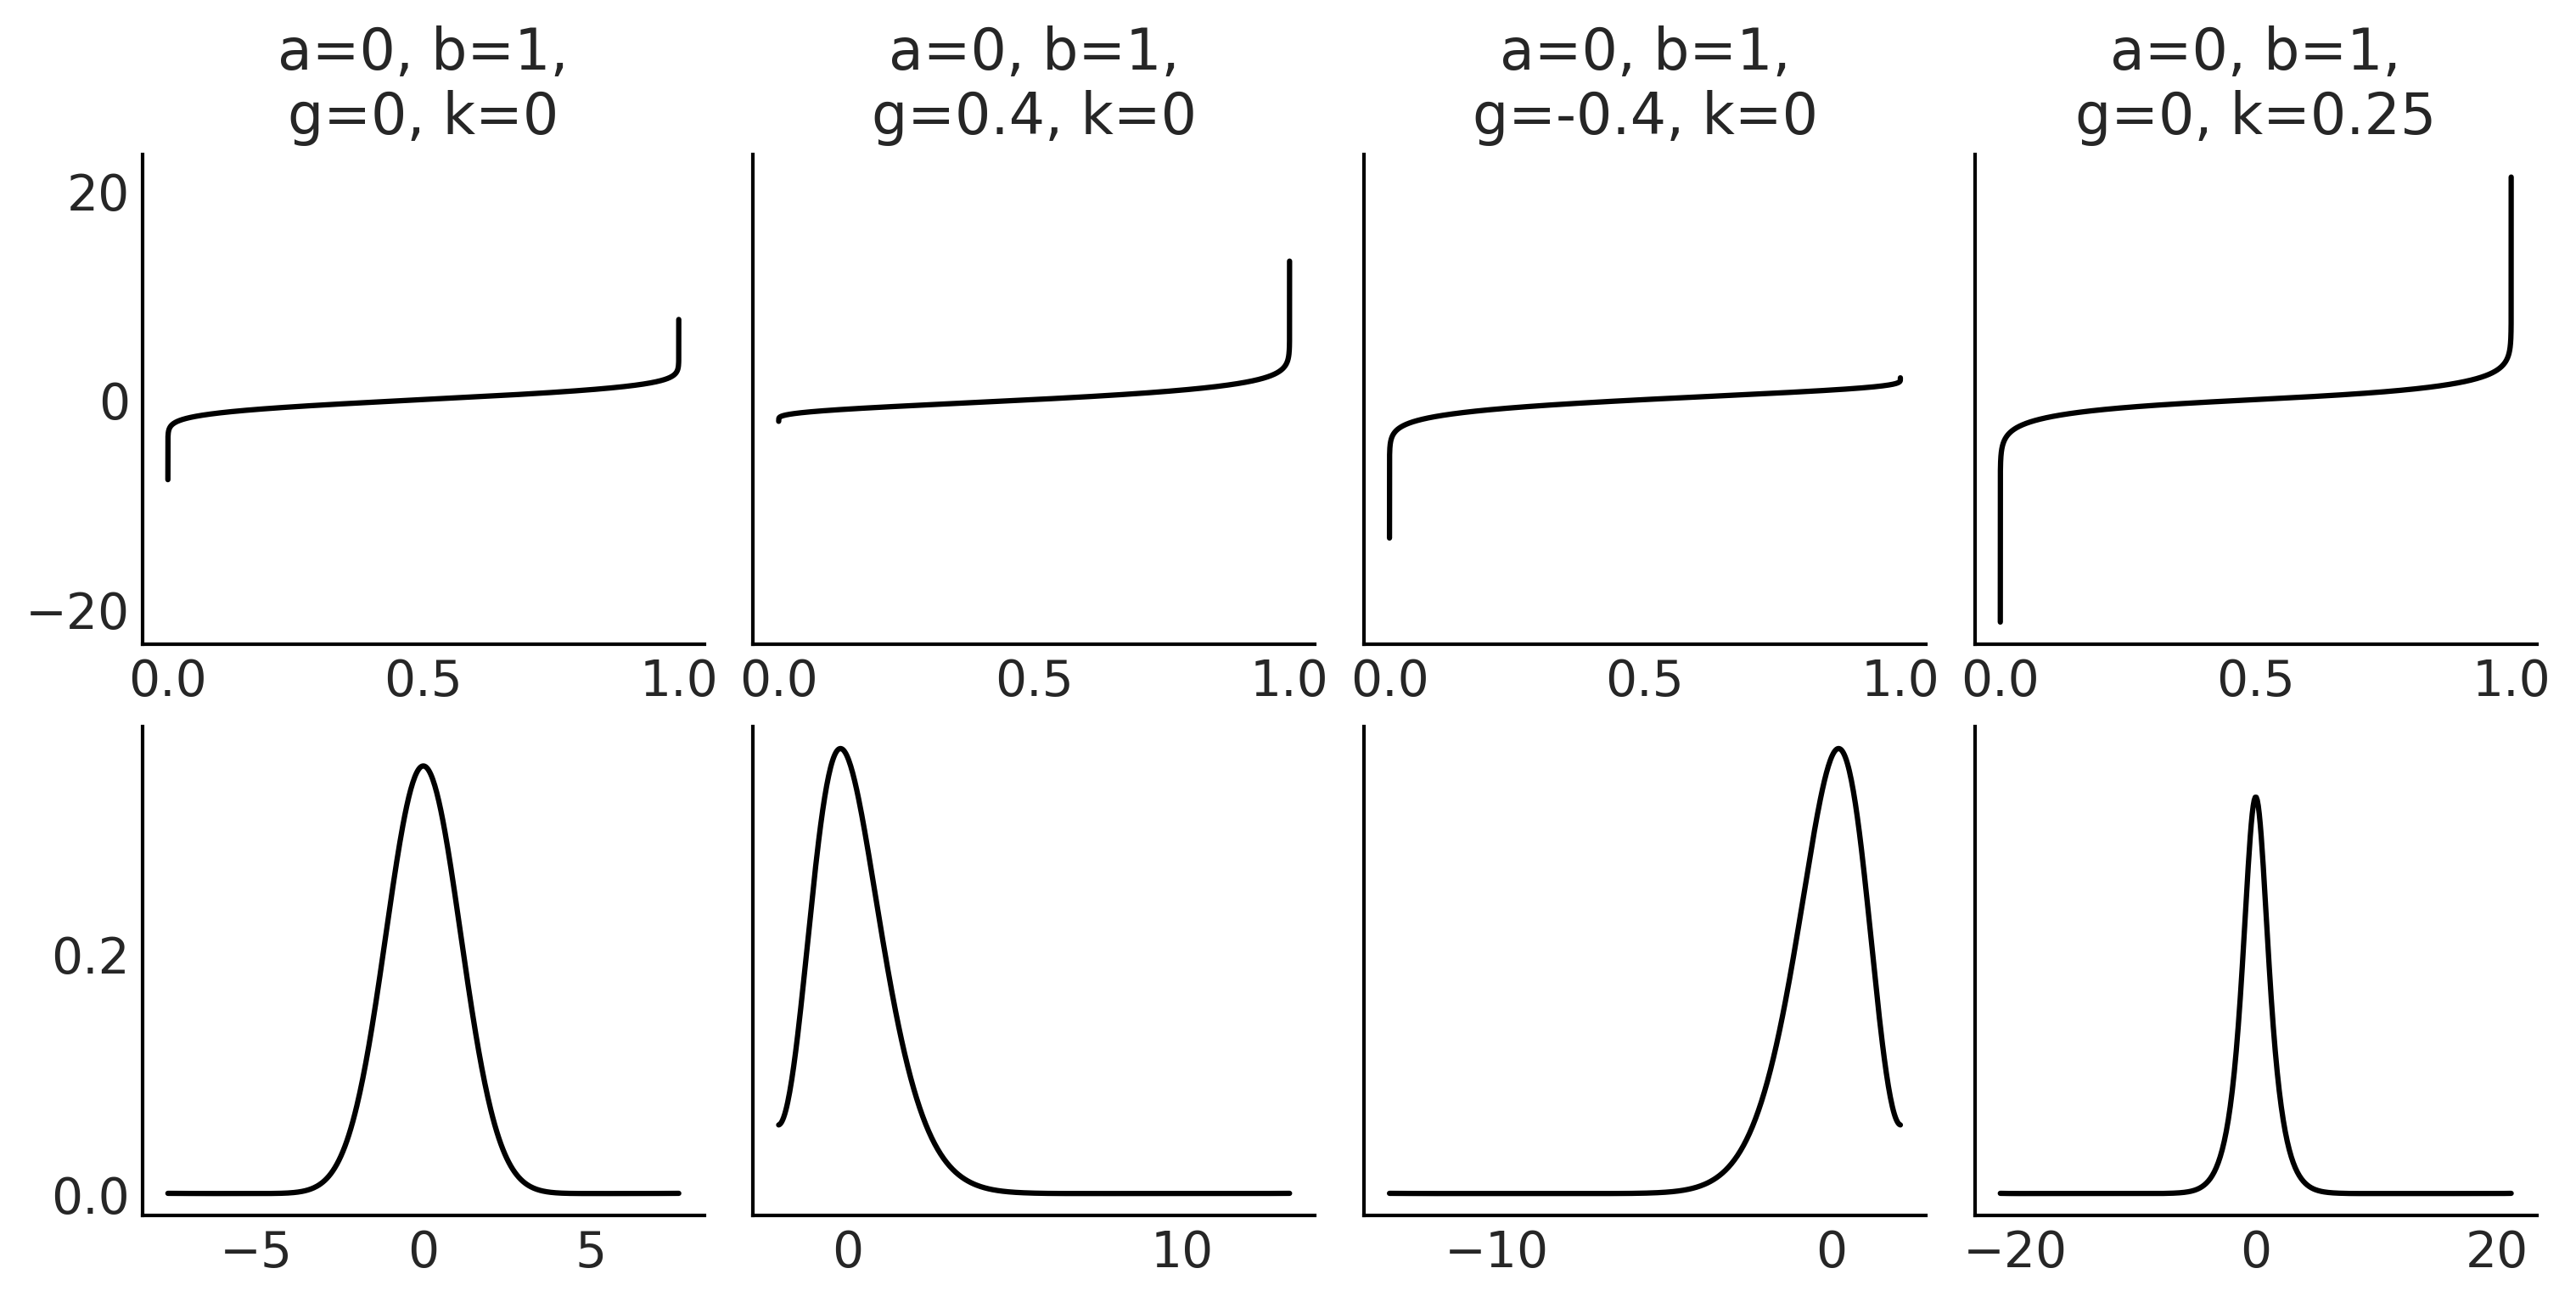

In [30]:
gk = g_and_k_quantile()
u = np.linspace(1E-14, 1-1E-14, 10000)

params = ((0, 1, 0, 0), 
 (0, 1, .4, 0),
 (0, 1,-.4, 0),
 (0, 1, 0, 0.25))

_, ax = plt.subplots(2, 4, sharey="row", figsize=(10, 5))
for i, p in enumerate(params):
    a, b, g, k = p
    ppf = gk.ppf(u, a, b, g, k)
    ax[0, i].plot(u, ppf)
    ax[0, i].set_title(f"a={a}, b={b},\ng={g}, k={k}")
    #ax[1, i].plot(x, gk.pdf(x, a, b, g, k))
    az.plot_kde(ppf, ax=ax[1, i], bw=0.5)
# plt.savefig("img/chp08/gk_quantile.png")

### Code 8.5

In [31]:
def octo_summary(x):
    e1, e2, e3, e4, e5, e6, e7 = np.quantile(x, [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])
    sa = e4
    sb = e6 - e2
    sg = (e6 + e2 - 2*e4)/sb
    sk = (e7 - e5 + e3 - e1)/sb
    return np.array([sa, sb, sg, sk])

### Code 8.6

In [32]:
gk = g_and_k_quantile()
def gk_simulator(a, b, g, k):
    return gk.rvs(len(bsas_co), a, b, g, k)

### Code 8.7 and Figure 8.11

In [33]:
with pm.Model() as gkm:
    a = pm.HalfNormal('a', sd=1)
    b = pm.HalfNormal('b', sd=1)
    g = pm.HalfNormal('g', sd=1)
    k = pm.HalfNormal('k', sd=1)
    
    s = pm.Simulator('s', gk_simulator, params=[a, b, g, k],        
                     sum_stat=octo_summary,
                     epsilon=0.1,
                     observed=bsas_co)
    
    trace_gk, sim_data_gk = pm.sample_smc(kernel="ABC",
                                          parallel=True,
                                          save_sim_data=True,
                                          )

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.014
Stage:   1 Beta: 0.070
Stage:   2 Beta: 0.250
Stage:   3 Beta: 0.705
Stage:   4 Beta: 1.000


In [34]:
az.summary(trace_gk)

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a  0.503  0.100   0.313    0.685      0.001    0.001   11529.0   11491.0   
b  0.196  0.071   0.065    0.333      0.001    0.000   11595.0   12023.0   
g  0.456  0.289   0.006    0.955      0.003    0.002   11754.0   11934.0   
k  0.147  0.087   0.006    0.298      0.001    0.001   10959.0   10824.0   

   r_hat  
a    1.0  
b    1.0  
g    1.0  
k    1.0

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'g'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'k'}>,
        <AxesSubplot:title={'center':'k'}, xlabel='Rank (all chains)'>]],
      dtype=object)

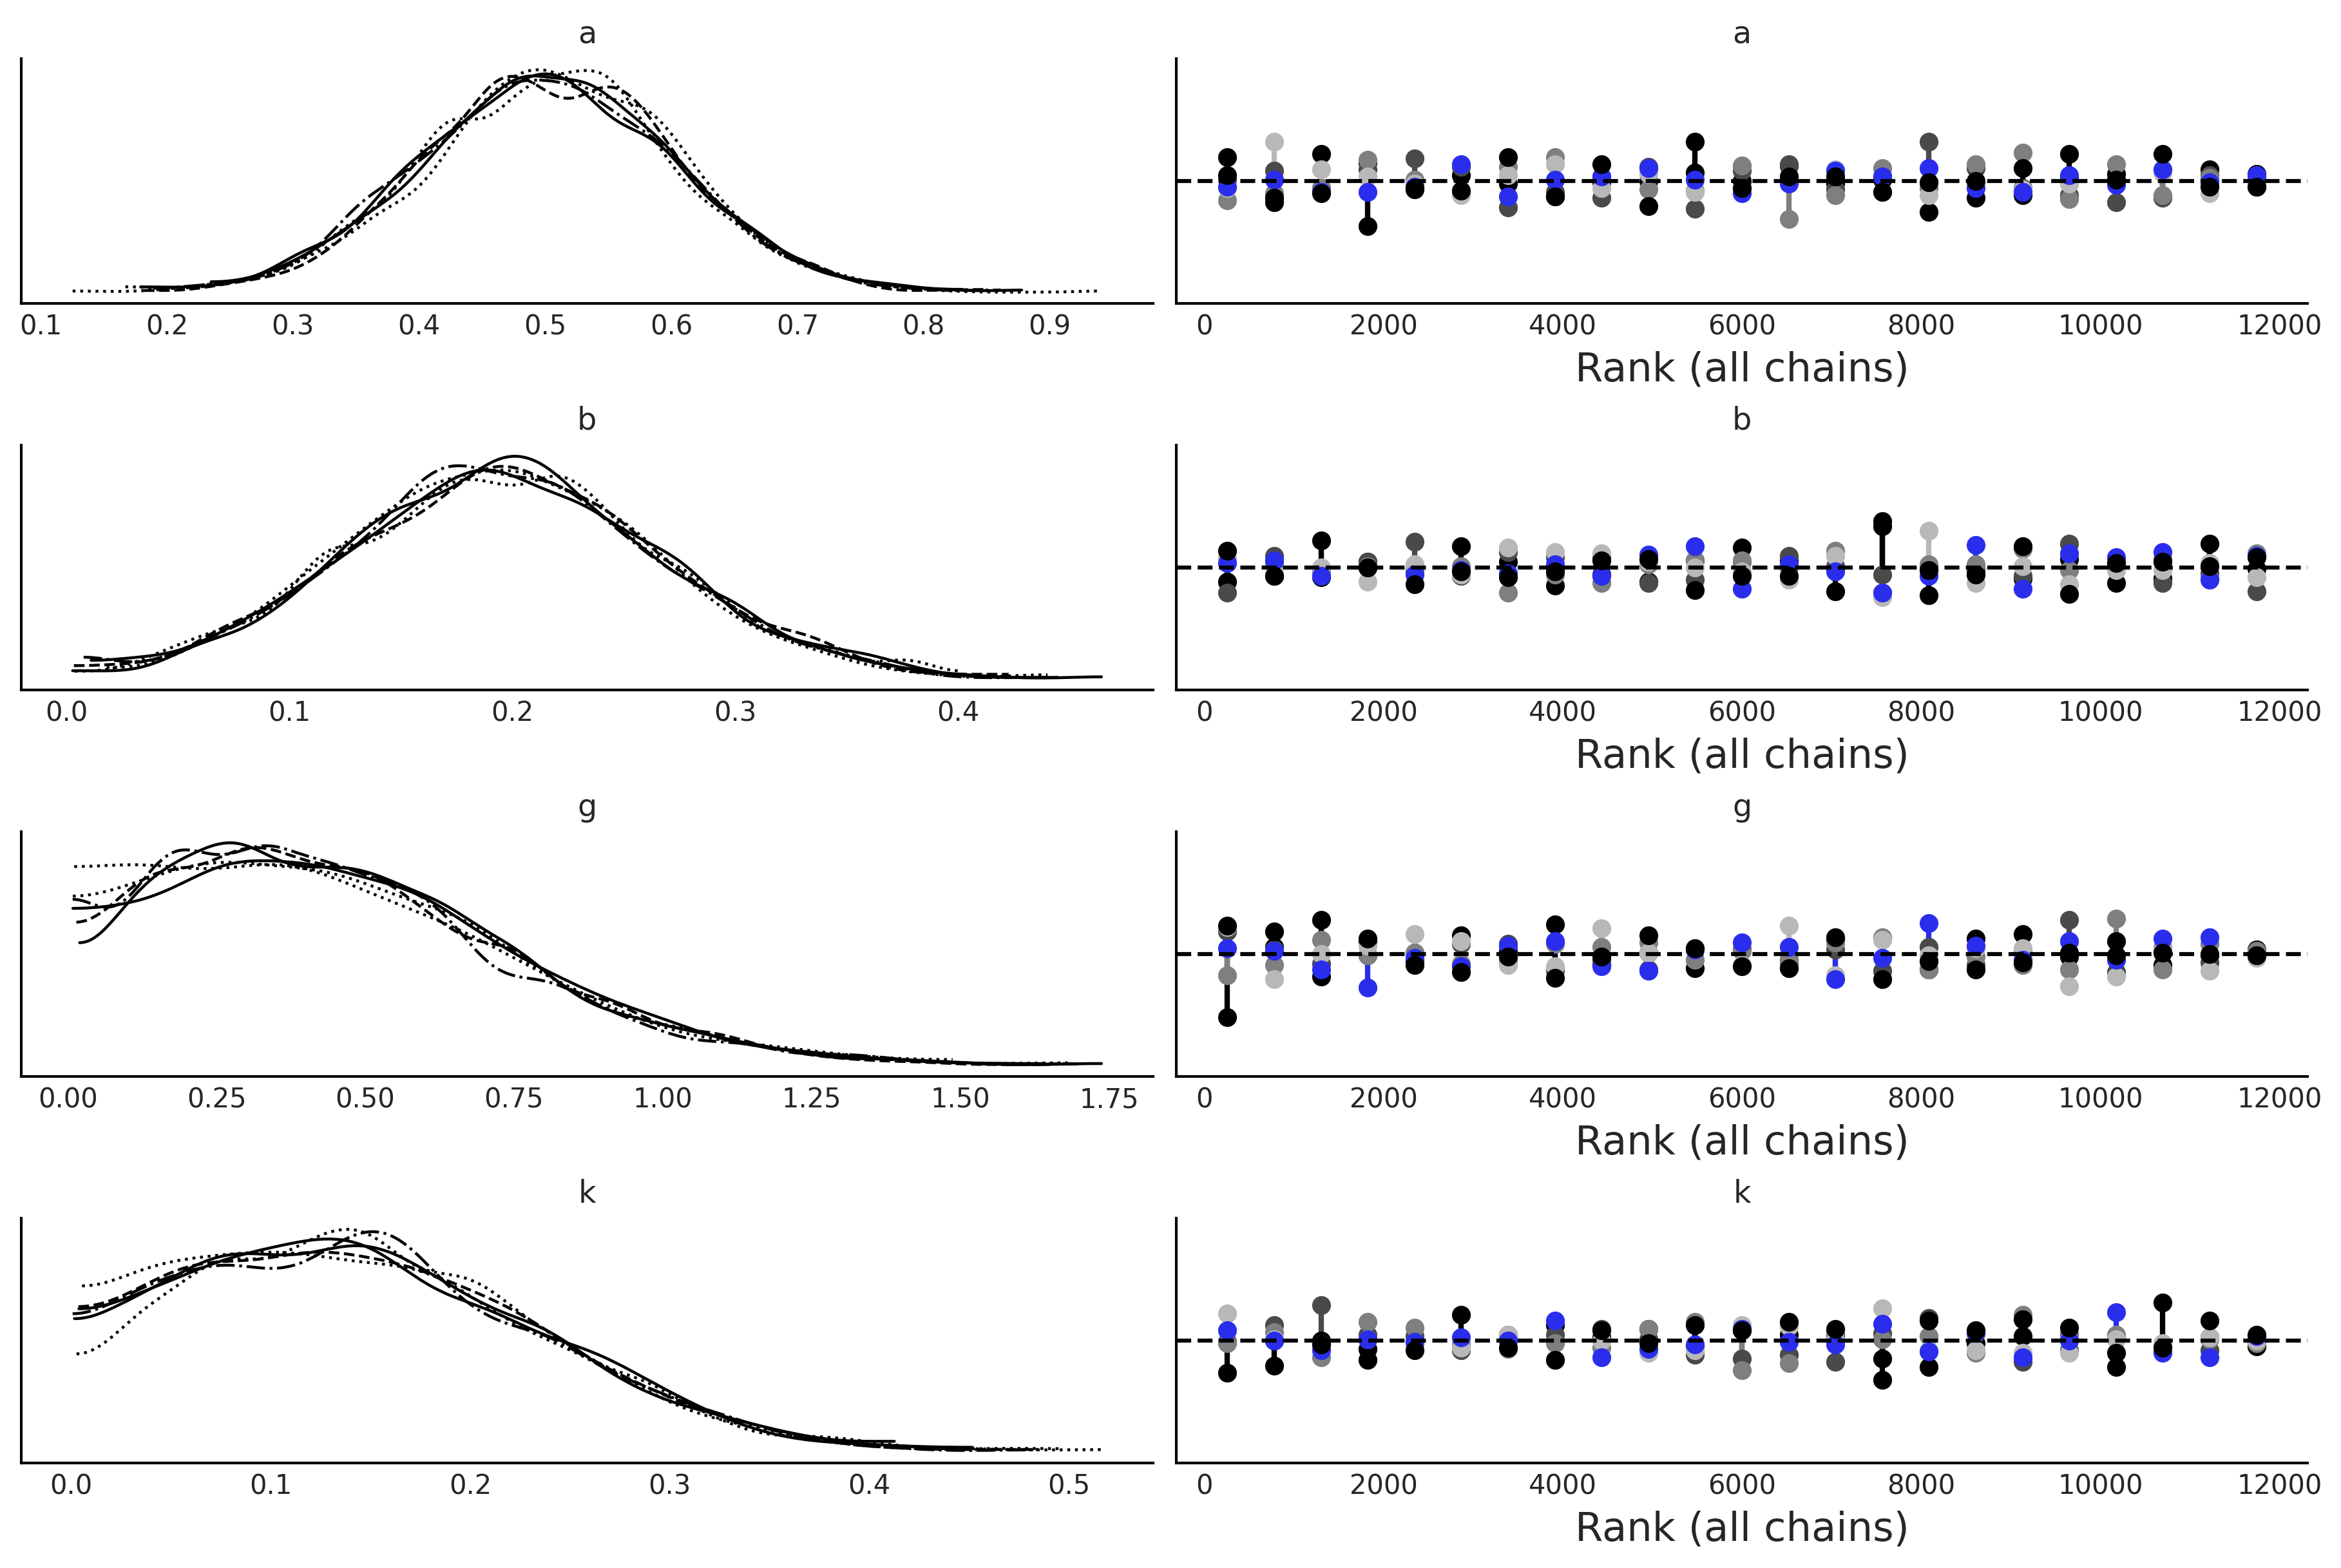

In [35]:
az.plot_trace(trace_gk, kind="rank_vlines")
# plt.savefig("img/chp08/trace_gk.png")

In [36]:
axes = az.plot_pair(trace_gk, 
                    kind="kde", 
                    marginals=True,
                    textsize=45,
                    kde_kwargs={"contourf_kwargs":{"cmap":plt.cm.viridis}},
                    )

for ax, pad in zip(axes[:,0], (70, 30, 30, 30)):
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=pad)

# plt.savefig("img/chp08/pair_gk.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


## Approximating moving averages

### Code 8.8 and Figure 8.12

In [37]:
def moving_average_2(θ1, θ2, n_obs=200):
    λ = np.random.normal(0, 1, n_obs+2)
    y = λ[2:] + θ1*λ[1:-1] + θ2*λ[:-2]
    return y

We are calling the simulator one more time to generate "observed data".

In [38]:
θ1_true = 0.7
θ2_true = 0.3
y_obs = moving_average_2(θ1_true, θ2_true)

array([[<AxesSubplot:title={'center':'one sample'}>,
        <AxesSubplot:title={'center':'one sample'}>],
       [<AxesSubplot:title={'center':'another sample'}>,
        <AxesSubplot:title={'center':'another sample'}>]], dtype=object)

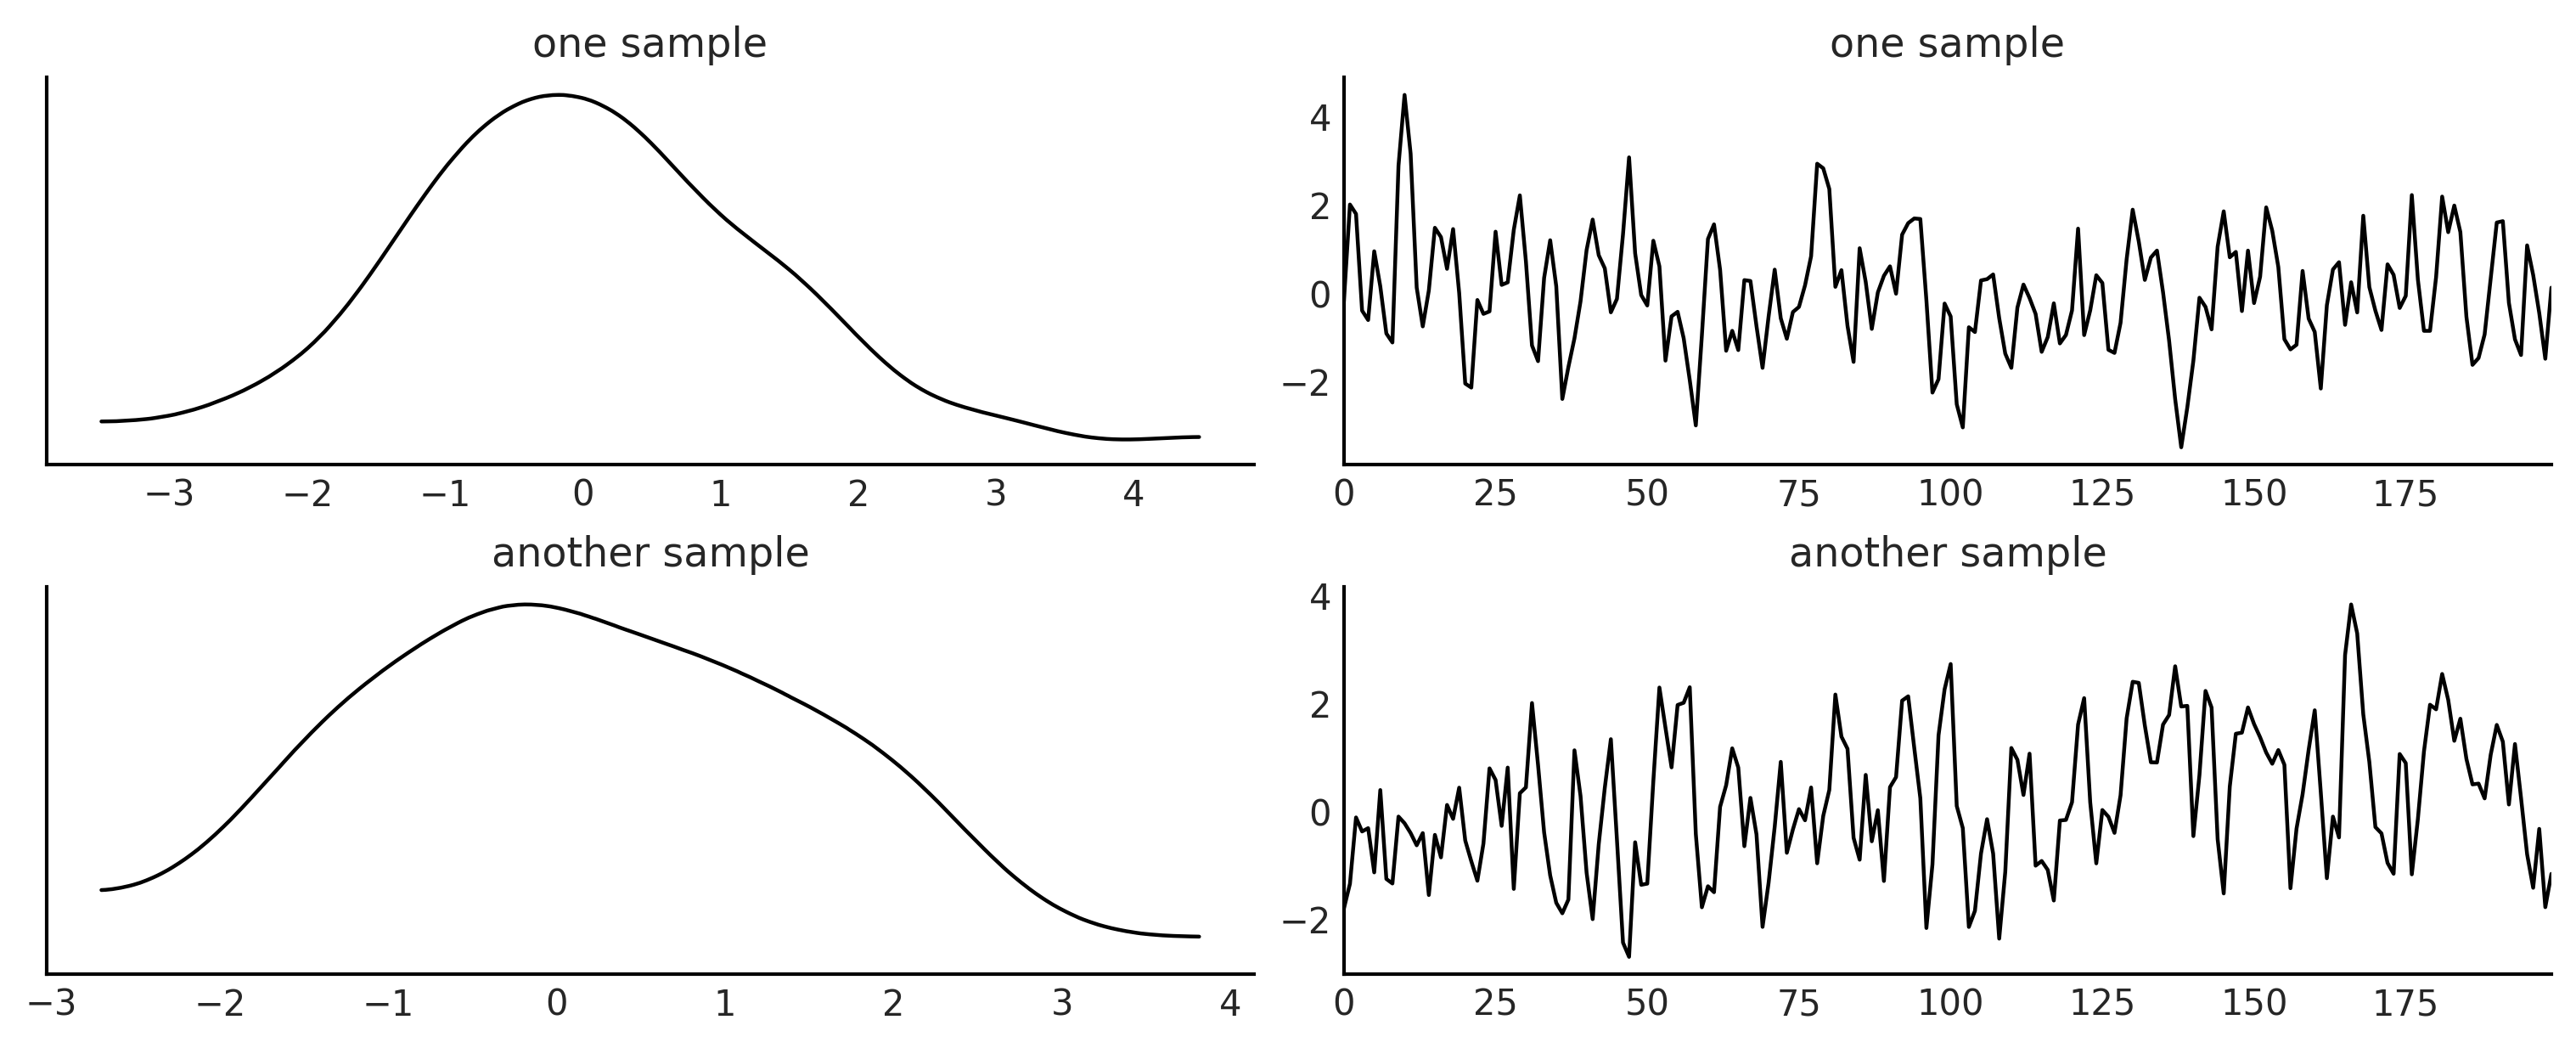

In [39]:
az.plot_trace({'one sample':moving_average_2(θ1_true, θ2_true),
               'another sample':moving_average_2(θ1_true, θ2_true)},
              trace_kwargs={'alpha':1},
              figsize=(10, 4)
             )
# plt.savefig("img/chp08/ma2_simulator_abc.png")

### Code 8.9

In [40]:
def autocov(x):
    a = np.mean(x[1:] * x[:-1])
    b = np.mean(x[2:] * x[:-2])
    return np.array((a, b))

### Code 8.10 and Figure 8.13

In [41]:
with pm.Model() as model_ma2:
    θ1 = pm.Uniform('θ1', -2, 2)
    θ2 = pm.Uniform('θ2', -1, 1)
    p1 = pm.Potential("p1", pm.math.switch(θ1+θ2 > -1, 0, -np.inf))
    p2 = pm.Potential("p2", pm.math.switch(θ1-θ2 < 1, 0, -np.inf))

    y = pm.Simulator('y', moving_average_2,
                     params=[θ1, θ2],
                     sum_stat=autocov,
                     epsilon=0.1,
                     observed=y_obs)

    trace_ma2 = pm.sample_smc(3000, kernel="ABC", parallel=True)

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Potentials will be added to the prior term
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarni

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'θ1'}>,
        <AxesSubplot:title={'center':'θ1'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'θ2'}>,
        <AxesSubplot:title={'center':'θ2'}, xlabel='Rank (all chains)'>]],
      dtype=object)

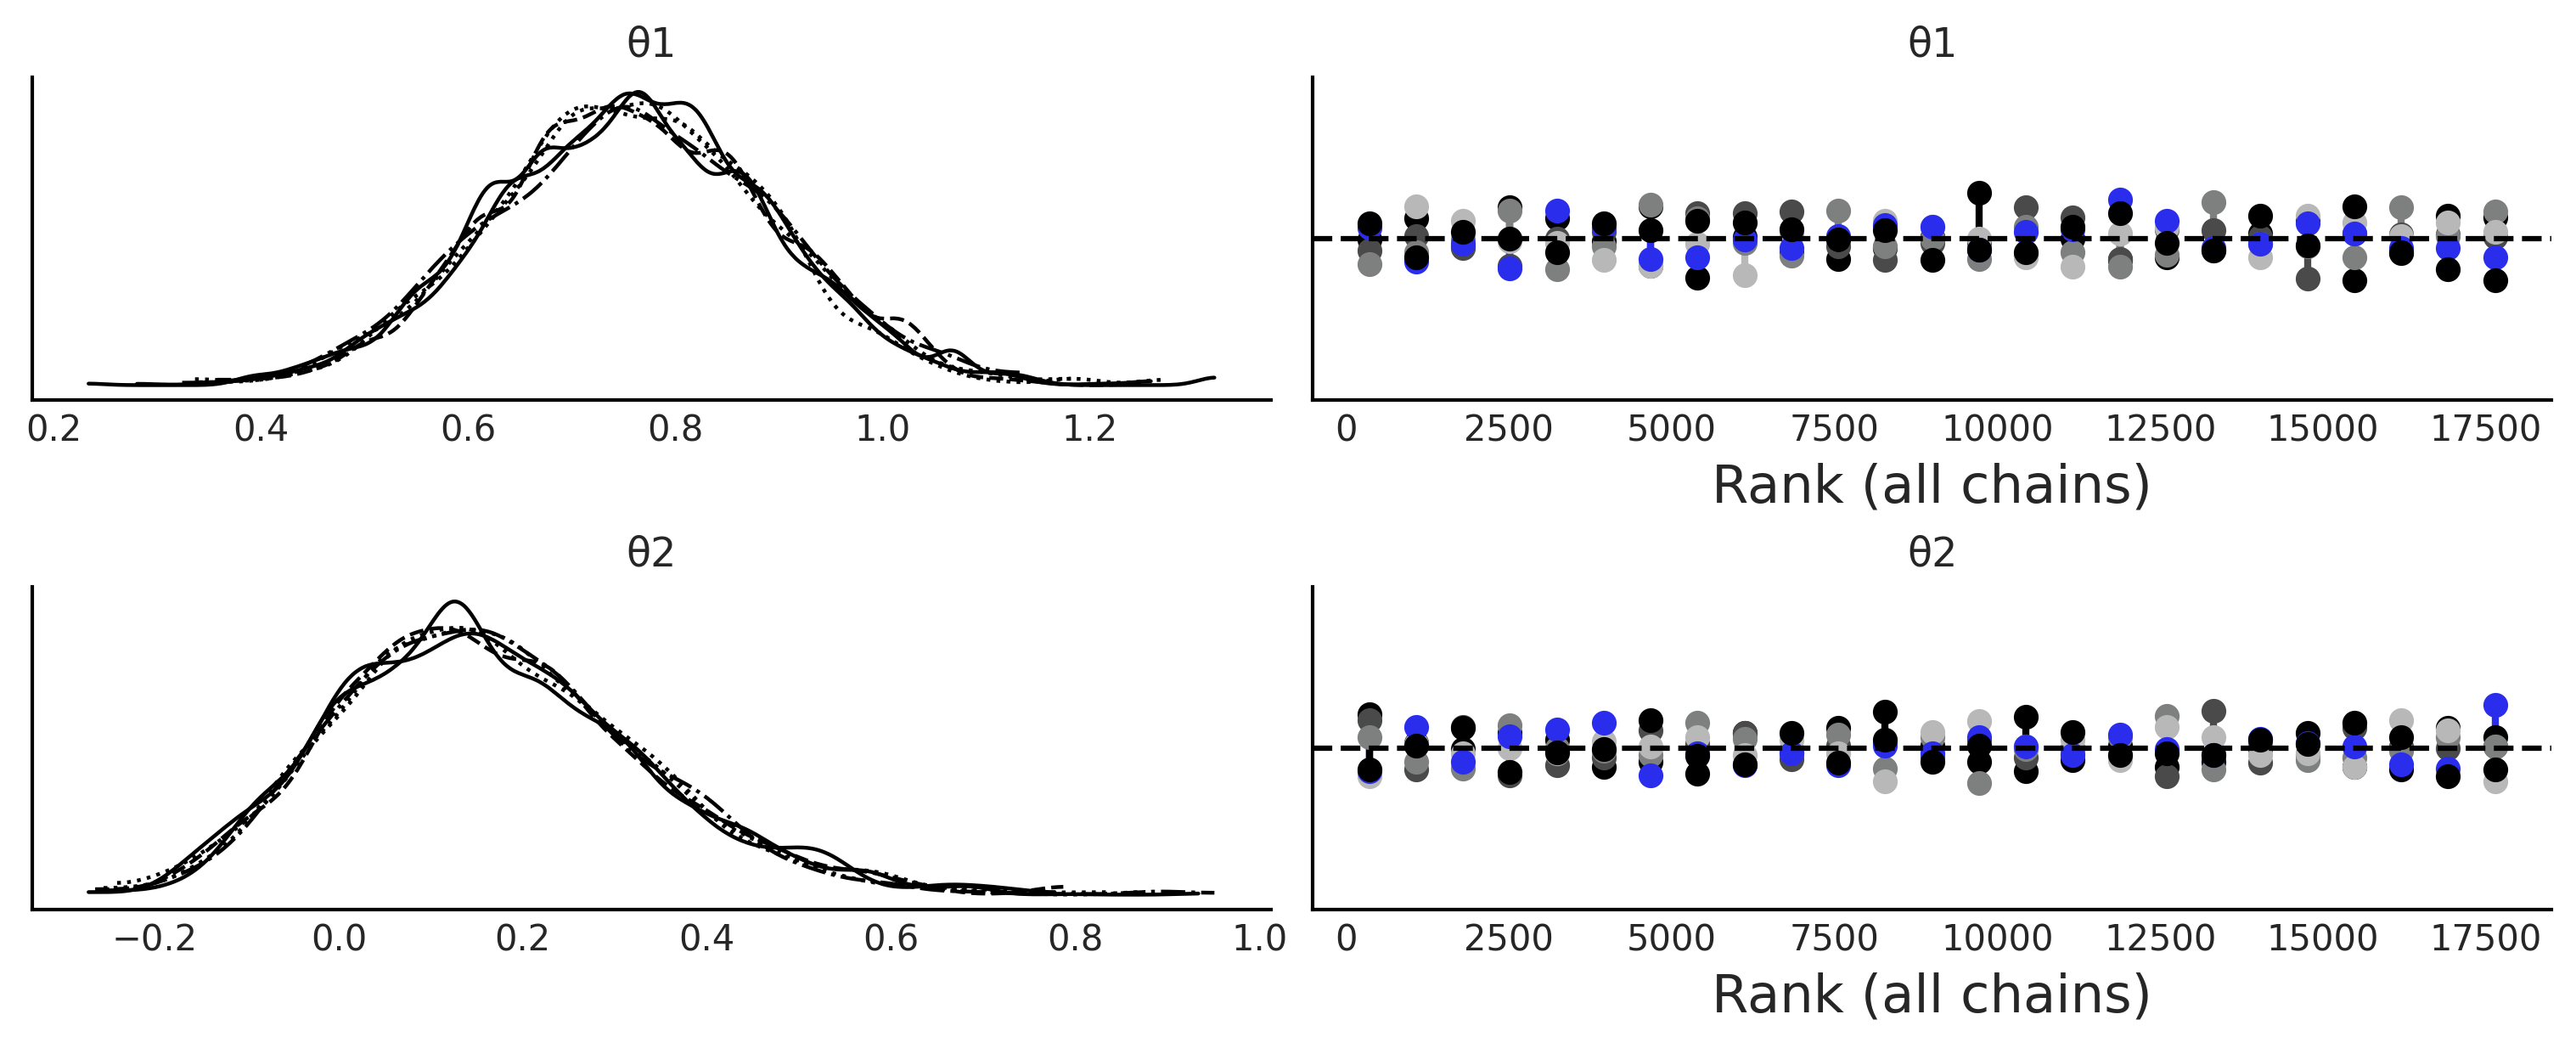

In [42]:
az.plot_trace(trace_ma2, kind="rank_vlines", figsize=(10, 4))
# plt.savefig("img/chp08/ma2_trace.png")

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


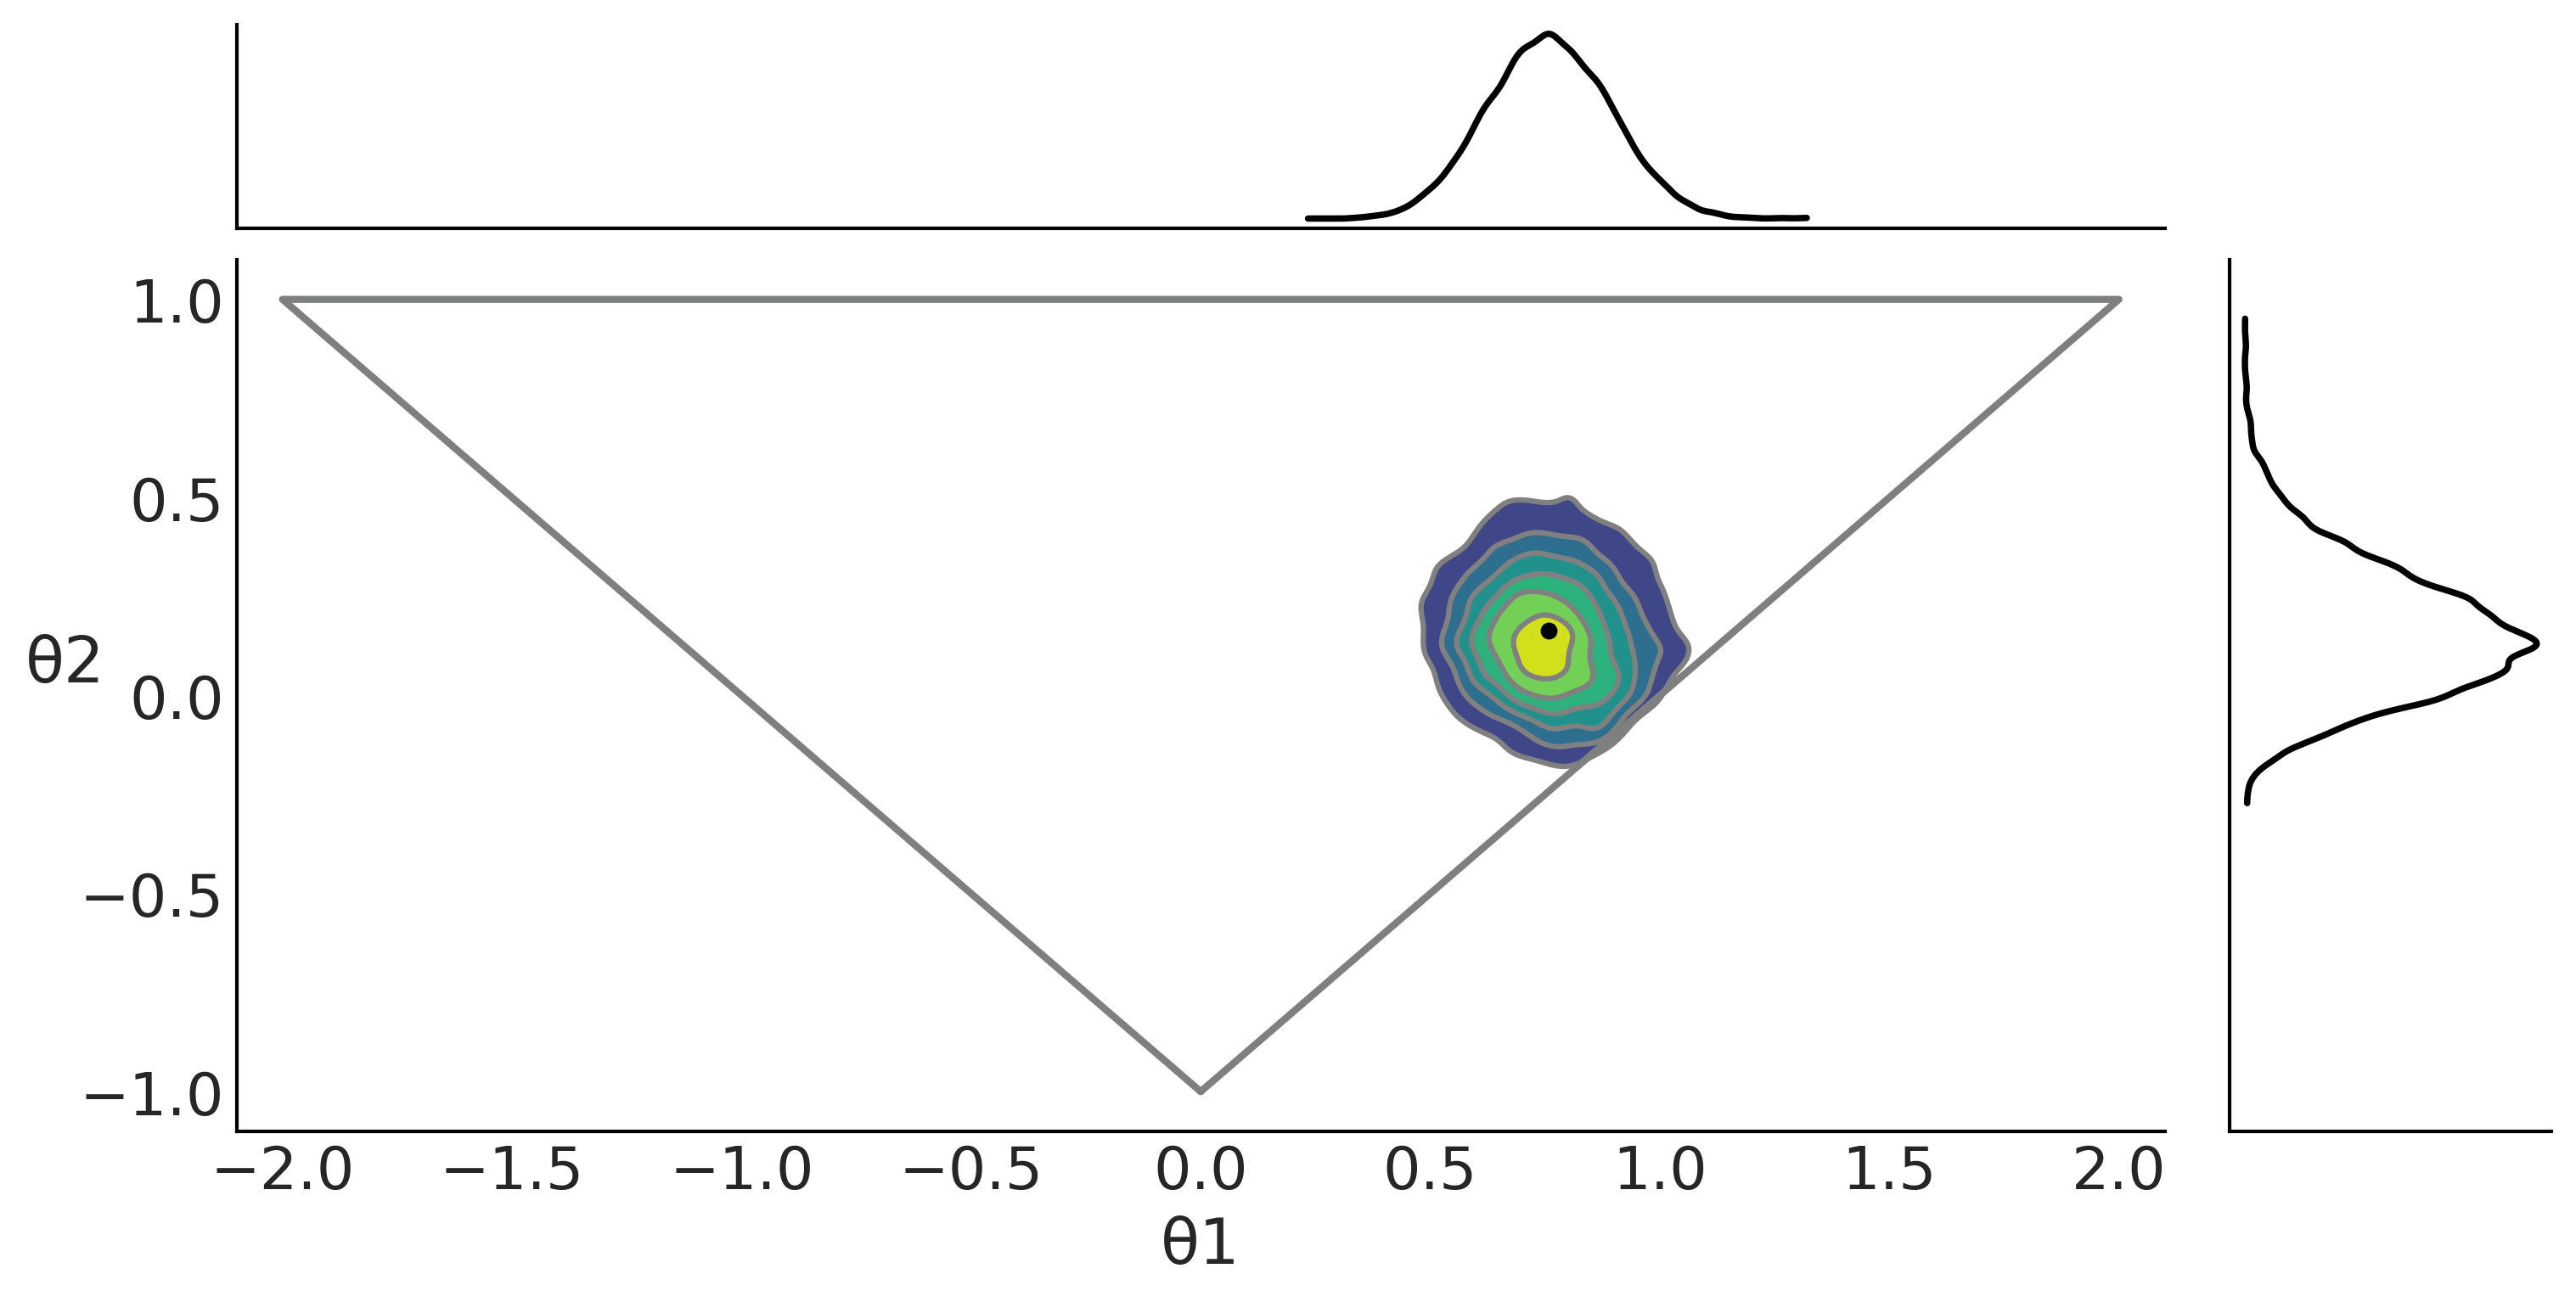

In [43]:
#ax = az.plot_pair(t_p, var_names=["θ1", "θ2"], marginals=True)
axes = az.plot_pair(trace_ma2, kind="kde", var_names=["θ1", "θ2"],
                    marginals=True, figsize=(10,5),
                    kde_kwargs={"contourf_kwargs":{"cmap":plt.cm.viridis}},
                    point_estimate="mean",
                    point_estimate_kwargs={"ls":"none"},
                    point_estimate_marker_kwargs={"marker":".",
                                                  "facecolor":"k",
                                                  "zorder":2})

axes[1,0].set_xlim(-2.1, 2.1)
axes[1,0].set_ylim(-1.1, 1.1)
axes[1,0].set_ylabel(axes[1,0].get_ylabel(), rotation=0)
axes[1,0].plot([0, 2, -2, 0], [-1, 1, 1, -1], "C2", lw=2)
# plt.savefig("img/chp08/ma2_triangle.png")

## Model Comparison in the ABC context

To reproduce the figures in the book, run `loo_abc.py`

##  Model choice via random forest

In [44]:
def moving_average_1(θ1, n_obs=500):
    λ = np.random.normal(0, 1, n_obs+1)
    y = λ[2:] + θ1*λ[1:-1]
    return y

def moving_average_2(θ1, θ2, n_obs=500):
    λ = np.random.normal(0, 1, n_obs+2)
    y = λ[2:] + θ1*λ[1:-1] + θ2*λ[:-2]
    return y

θ1_true = 0.7
θ2_true = 0.3
y_obs = moving_average_2(θ1_true, θ2_true)

In [45]:
def autocov(x, n=2):
    return np.array([np.mean(x[i:] * x[:-i]) for i in range(1, n+1)])

### Code 8.12

In [46]:
with pm.Model() as model_ma1:
    θ1 = pm.Uniform('θ1', -1, 1)
    y = pm.Simulator('y', moving_average_1,
                     params=[θ1], sum_stat=autocov, epsilon=0.1, observed=y_obs)
    trace_ma1 = pm.sample_smc(3000, kernel="ABC", parallel=True)

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.034
Stage:   1 Beta: 0.186
Stage:   2 Beta: 0.610
Stage:   3 Beta: 1.000


In [47]:
with pm.Model() as model_ma2:
    θ1 = pm.Uniform('θ1', -2, 2)
    θ2 = pm.Uniform('θ2', -1, 1)
    p1 = pm.Potential("p1", pm.math.switch(θ1+θ2 > -1, 0, -np.inf))
    p2 = pm.Potential("p2", pm.math.switch(θ1-θ2 < 1, 0, -np.inf))

    y = pm.Simulator('y', moving_average_2,
                     params=[θ1, θ2],
                     sum_stat=autocov,
                     epsilon=0.1,
                     observed=y_obs)

    trace_ma2 = pm.sample_smc(3000, kernel="ABC", parallel=True)

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Potentials will be added to the prior term
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1925: UserWarni

In [48]:
mll_ma2 = np.exp(trace_ma2.report.log_marginal_likelihood.mean())
mll_ma1 = np.exp(trace_ma1.report.log_marginal_likelihood.mean())

mll_ma2/mll_ma1

1.622020347021304

### Code 8.13

In [49]:
idata_ma1 = az.from_pymc3(trace_ma1)
lpll = {"s":np.array(trace_ma1.report.log_pseudolikelihood)}
idata_ma1.log_likelihood = az.data.base.dict_to_dataset(lpll)

idata_ma2 = az.from_pymc3(trace_ma2)
lpll = {"s":trace_ma2.report.log_pseudolikelihood}
idata_ma2.log_likelihood = az.data.base.dict_to_dataset(lpll)


cmp = az.compare({"model_ma1":idata_ma1, "model_ma2":idata_ma2})
cmp

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and hi

rank       loo     p_loo     d_loo  weight        se       dse  \
model_ma2     0 -2.083793  1.409179  0.000000     1.0  0.093528  0.000000   
model_ma1     1 -3.150683  1.865973  1.066891     0.0  1.068782  1.162311   

           warning loo_scale  
model_ma2     True       log  
model_ma1     True       log

### Code 8.14

In [50]:
from functools import partial
select_model([(model_ma1, trace_ma1), (model_ma2, trace_ma2)], 
             statistics=[partial(autocov, n=6)],
             n_samples=10000,
             observations=y_obs)

/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
/home/david/mambaforge/envs/bmcp/lib/python3.9/site-packages/pymc3/sampling.py:1698: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(


(1, 1.0)